# Librairies

In [1]:
import os
import csv
import json
import time
import logging
import math
from datetime import datetime
from random import *
from collections import defaultdict
from pathlib import Path
import itertools


import numpy as np
import pandas as pd


import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

In [ ]:
# #----------------------------------------------------------------------------------------------- Plot functions -----------------------------------------------------------------------------------------------#

# In[7]:


#- Mean fpt in function of x -#
def plot_mean_fpt(mean_results, mean_alpha, title_0, title_size, legend_size, saving):
    if saving :
        fig_fpt_mean = plt.figure(figsize=(8,6), num='mean_fpt')
        title_mean = 'mean_fpt__'+title_0
        plt.title(title_mean, fontsize=title_size)
        plt.plot(np.arange(0,len(mean_results)), mean_results, 'r', label='Mean_fpt')
        plt.plot(np.arange(len(mean_alpha)), mean_alpha*int(np.mean(mean_results)), 'b-', lw=0.5, label='Mean_obstacle')
        plt.xlabel('x_[bp]')
        plt.ylabel('t_[s]')
        plt.grid(True)
        plt.legend(fontsize=legend_size, loc='upper left')
        # show
        savepath = os.path.join(title_0, title_mean+'.png')
        plt.savefig(savepath)
        plt.close(fig_fpt_mean)
    return None
#- -#


#- 2D mapping of fpts -#
def plot_map_2D_fpt(fpt_2D, title_0, title_size, saving):
    if saving: 
        fig_fpt_marcand_2D = plt.figure(figsize=(8,6), num='fpt_2D')
        title_2D = 'distrib_of_all_fpt__'+title_0
        plt.title(title_2D, fontsize=title_size)
        plt.imshow(fpt_2D.T, cmap='bwr', aspect='auto', origin='lower', vmin=0.001, vmax=0.1)
        plt.xlabel('x_[bp]')
        plt.ylabel('t_[s]')
        plt.grid(True)
        plt.colorbar()
        # show
        savepath = os.path.join(title_0, title_2D+'.png')
        plt.savefig(savepath)
        plt.close(fig_fpt_marcand_2D)
    return None
#- -#


#- Distribution of fpt(x_max) -#
def plot_distrib_fpt_x_max(fpt_x_max, bins_fpt, bins_fpt_x_max, counts_fpt_xmax_normalized, title_0, title_size, legend_size, saving):
    if saving :
        fig_fpt_x_max = plt.figure(figsize=(8,6), num='fpt_x_max')
        title_fpt_x_max = 'distrib_fpt_x_max__'+title_0
        plt.title(title_fpt_x_max, fontsize=title_size)
        plt.hist(fpt_x_max, bins=bins_fpt, color='b', edgecolor='k', alpha=0.7, label='hist', density=True)
        plt.plot(bins_fpt_x_max, counts_fpt_xmax_normalized, marker='+', ls='-', c='r', label='plot')        
        plt.xlabel('t_[s]')
        plt.ylabel('density')
        plt.grid(True)
        plt.legend(fontsize=legend_size, loc='upper left')
        # show
        savepath = os.path.join(title_0, title_fpt_x_max+'.png')
        plt.savefig(savepath)
        plt.close(fig_fpt_x_max)
    return None
#- -#


#- Probabilities : 1-ditrib(fpt(f_max))
def plot_proba_pass(counts_fpt_xmax, title_0, title_size, legend_size, saving):
    if saving : 
        fig_fpt_proba = plt.figure(figsize=(8,6), num='fpt_proba')
        title_fpt_proba = 'tau_fpt_x_max__'+title_0
        plt.title(title_fpt_proba, fontsize=title_size)
        # plt.hist(result_x_max, bins=bins_fpt, color='b', edgecolor='k', alpha=0.7, label='hist', density=True)
        plt.plot(counts_fpt_xmax, marker='+', ls='-', c='r', label='plot')        
        plt.xlabel('t_[s]')
        plt.ylabel('density')
        plt.grid(True)
        plt.legend(fontsize=legend_size, loc='upper left')
        # show
        savepath = os.path.join(title_0, title_fpt_proba+'.png')
        plt.savefig(savepath)
        plt.close(fig_fpt_proba)
    return None
#- -#


def plot_v(P_pass_normalized, P_slowing_normalized, title_0) :
    if saving : 
        title_p_marcand = 'p_pass__'+title_0
        plt.figure(figsize=(8,6))
        plt.plot(np.arange(len(P_pass_normalized)), P_pass_normalized, label='-x_max')
        plt.plot(np.arange(len(P_slowing_normalized)), P_slowing_normalized, label='-x_min')
        plt.legend()
        # show
        savepath = os.path.join(title_0, title_p_marcand+'.png')
        plt.savefig(savepath)
        plt.close(title_p_marcand)    
    return None


#- -#
def plot_for_results_marcand(fpt_mean, fpt_2D, fpt_x_max, tau_fpt_x_max, 
                             bins_fpt, bins_fpt_x_max, counts_fpt_xmax_normalized, 
                             v_marcand, P_pass_normalized, P_slowing_normalized, 
                             obs_normalized, mean_alpha, title_0, title_size, legend_size, saving):
    
    # I : Plot the average first pass time for each position
    plot_mean_fpt(fpt_mean, mean_alpha, title_0, title_size, legend_size, saving)

    # II : Plot the 2D histogram of all first pass times
    plot_map_2D_fpt(fpt_2D, title_0, title_size, saving)

    # III : Plot the histogram of the last first pass time
    plot_distrib_fpt_x_max(fpt_x_max, bins_fpt, bins_fpt_x_max, counts_fpt_xmax_normalized, title_0, title_size, legend_size, saving)

    # IV : Plot the cumulative probability of passage (tau)
    plot_proba_pass(tau_fpt_x_max, title_0, title_size, legend_size, saving)

    # V : 
    plot_v(P_pass_normalized, P_slowing_normalized, title_0)


    return None
#- -#









#-- Probabilities plot --#
def plot_for_probabilities(_alpha_list_, _P_, _title_0_, _title_size_, _x_size_, _y_size_, _legend_size_, _saving_):
    if _saving_:
        fig_proba = plt.figure(figsize=(8, 6), num='probabilities')
        title_proba = 'probabilities__' + _title_0_
        plt.title(title_proba, fontsize=_title_size_)
        plt.step(np.arange(0, len(_alpha_list_[0]), 1), _alpha_list_[0], color='b', lw=0.5, label='portion_of_obstacle')
        plt.plot(np.arange(0, len(_P_), 1), _P_, 'r-', lw=2, label='jump_probability')
        plt.xlabel('x_in_bp', fontsize=_x_size_)
        plt.ylabel('p__x_k_theta', fontsize=_y_size_)
        plt.xlim(0, 1e3)
        plt.grid(True)
        plt.legend(fontsize=_legend_size_, loc='upper right')
        
        savepath = os.path.join(_title_0_, title_proba + '.png')
        plt.savefig(savepath)
        plt.close(fig_proba)

        return None
#--   --#


#-- Obstacles plot --#
def plot_for_obstacles(_dict_plot_x_, _dict_plot_y_, _title_0_, _title_size_, _x_size_, _y_size_, _legend_size_, _saving_):
    if _saving_:
        fig_obs = plt.figure(figsize=(8, 6), num='obs_disp')
        title_obs_disp = 'obstacle_dispersion__' + _title_0_
        plt.title(title_obs_disp, fontsize=_title_size_)
        plt.plot(_dict_plot_x_, _dict_plot_y_, label='plot', color='b')
        plt.scatter(_dict_plot_x_, _dict_plot_y_, label='points', marker='D', color='r', alpha=0.3)
        plt.xlabel('size_of_nuclosome_in_bp', fontsize=_x_size_)
        plt.ylabel('count', fontsize=_y_size_)
        plt.grid(True)
        plt.legend(fontsize=_legend_size_, loc='upper right')

        savepath = os.path.join(_title_0_, title_obs_disp + '.png')
        plt.savefig(savepath)
        plt.close(fig_obs)

        return None
#--   --#


#-- Trajectories plot --#
def plot_for_trajectories(_results_, _mean_results_, _v_mean_, _err_v_, _t_max_, _L_max_, _origin_, _title_0_, _dt_, _title_size_, _x_size_, _y_size_, _legend_size_, _saving_):
    if _saving_:
        fig_traj = plt.figure(figsize=(8, 6), num='trajectories')
        
        for n in range(len(_results_)):
            plt.step(np.arange(1, _t_max_ + 1, 1), _results_[n], lw=0.2, c='b')

        title_trajectories = 'trajectories__' + _title_0_
        plt.title(title_trajectories, fontsize=_title_size_)
        plt.axhline(y=_L_max_- int(2 * _origin_), color='grey', linestyle='--', label=f'perturbations {_L_max_ - int(2 * _origin_)} [bp]')
        plt.axvline(x=_t_max_, color='grey', linestyle=':', label=f't_max {_t_max_} [s]')
        plt.plot(np.arange(1, _t_max_ + 1, 1), _mean_results_, color='r', label=f'mean_trajectory')
        plt.plot(np.arange(1, _t_max_ + 1, 1), np.round(_v_mean_, 2) * np.arange(0, _t_max_, 1), label=f'linear_speed v_mean: {_v_mean_} __ err_v: {_err_v_}', ls='--', c='r')
        plt.xlabel(f't_in_{_dt_}s', fontsize=_x_size_)
        plt.ylabel('x_in_bp', fontsize=_y_size_)
        plt.grid(True)
        plt.legend(fontsize=_legend_size_, loc='upper left')
        
        savepath = os.path.join(_title_0_, title_trajectories + '.png')
        plt.savefig(savepath)
        plt.close(fig_traj)

        return None
#--   --#



#-- All positions plot --#
def plot_for_pos_1D(_shifted_data_, _num_bins_, _L_, _mean_alpha_, _L_max_, _origin_, _title_0_, _title_size_, _x_size_, _y_size_, _legend_size_, _saving_):
    if _saving_:
        fig_all_pos = plt.figure(figsize=(8, 6), num='all_positions')
        title_all_pos = 'positions__' + _title_0_
        plt.title(title_all_pos, fontsize=_title_size_)
        plt.plot(_L_[0:_L_max_], _mean_alpha_[0:_L_max_] * np.mean(_shifted_data_), label='mean_obstacle', linewidth=0.5, color='b', alpha=0.2)
        plt.hist(_shifted_data_, bins=_num_bins_, label='all_position_distribution', color='r')
        plt.axvline(x=_origin_, label='interval_of_jumps', color='r', linestyle='--')
        plt.axvline(x=_L_max_-_origin_, color='r', linestyle='--')
        plt.axvline(x=0, color='b', linestyle='--')
        plt.axvline(x=_L_max_, label='interval_of_obstacles', color='b', linestyle='--')
        plt.xlabel('x_in_bp', fontsize=_x_size_)
        plt.ylabel('count', fontsize=_y_size_)
        plt.grid(True)
        plt.legend(fontsize=_legend_size_, loc='upper left')
        
        savepath = os.path.join(_title_0_, title_all_pos + '.png')
        plt.savefig(savepath)
        plt.close(fig_all_pos)

        return None
#--   --#


#-- Position hist 2D --#
def plot_for_pos_2D(_p_hist_list_, _t_max_, _L_max_, _origin_, _title_0_, _x_size_, _y_size_, _title_size_, _saving_):
    if _saving_:
        fig_hist_pos = plt.figure(figsize=(8, 6), num='pos_distrib')
        title_hist_pos = 'position_hists__' + _title_0_
        plt.title(title_hist_pos, fontsize=_title_size_)
        plt.imshow(_p_hist_list_, aspect='auto', origin='lower', cmap='bwr', vmin=0.00001, vmax=0.001)
        plt.xlabel('t_in_s', fontsize=_x_size_)
        plt.ylabel('x_in_bp', fontsize=_y_size_)
        plt.xticks(np.arange(0, int(_t_max_ + 1), 20))
        plt.yticks(np.arange(0, int(_L_max_ - (2 * _origin_) + 1), 2000))
        plt.grid(True)
        # Sauvegarde du graphique
        savepath = os.path.join(_title_0_, title_hist_pos + '.png')
        plt.savefig(savepath)
        plt.close(fig_hist_pos)

        return None
#--   --#


#-- Time between jumps --#
def plot_for_jump_distribution(_jt_bj_, _jt_bj_hist_, _title_0_, _title_size_, _x_size_, _y_size_, _legend_size_, _v_mean_, _num_bins_, _saving_):
    if _saving_:
        
        fig_hist_jump = plt.figure(figsize=(8, 6), num='jump_distrib')
        title_jumps = 'time_between_jumps_hist__' + _title_0_
        plt.title(title_jumps, fontsize=_title_size_)
        plt.xlabel('t_in_s', fontsize=_x_size_)
        plt.ylabel('density', fontsize=_y_size_)
        
        if _v_mean_ != 0:
            plt.hist(_jt_bj_, bins=_num_bins_, density=1, label='hist', color='b', alpha=0.7)
        
        plt.plot(np.arange(len(_jt_bj_hist_)), _jt_bj_hist_, 'r-', label='data')
        plt.legend(fontsize=_legend_size_, loc='upper right')
        plt.grid(True)
        
        savepath = os.path.join(_title_0_, title_jumps + '.png')
        plt.savefig(savepath)
        plt.close(fig_hist_jump)

        return None
#--   --#


#--   --#
def plot_for_fpt_distribution(_fpt_results_, _fpt_number_, _title_0_, _title_size_, _x_size_, _y_size_, _L_max_, _origin_, _n_t_, _saving_):
    if _saving_:

        fig_hist_fpt, axes = plt.subplots(2, 1, figsize=(8, 6), num='fpt_distrib')
        title_hist_fpt = 'first_pass_time__' + _title_0_
        plt.suptitle(title_hist_fpt, fontsize=_title_size_)
        
        axes[0].set_title('Histogram', fontsize=_title_size_)
        axes[0].set_xlabel('x_in_bp', fontsize=_x_size_)
        axes[0].set_ylabel('t_in_s', fontsize=_y_size_)
        axes[0].imshow(_fpt_results_, aspect='auto', origin='lower', cmap='bwr', vmin=0, vmax=0.1)
        axes[0].set_xlim(0, int(_L_max_ - 2 * _origin_))
        axes[0].grid(True)
        
        axes[1].set_title('Number of Trajectories That Reached the Positions', fontsize=_title_size_)
        axes[1].set_xlabel('x_in_bp', fontsize=_x_size_)
        axes[1].set_ylabel('n', fontsize=_y_size_)
        axes[1].plot(_fpt_number_, c='b')
        axes[1].set_xlim(0, int(_L_max_ - 2 * _origin_))
        axes[1].set_ylim(0, _n_t_)
        axes[1].grid(True)
        
        plt.tight_layout()
        savepath = os.path.join(_title_0_, title_hist_fpt + '.png')
        plt.savefig(savepath)
        plt.close(fig_hist_fpt)

        return None
#--   --#


#-- Instanteneous speeds hists --#
def compute_histogram_speeds(_speeds_, bin_width=1):
    num_bins = np.arange(0.1, np.max(_speeds_) + bin_width, bin_width)
    speed_hist, bin_edges = np.histogram(_speeds_, bins=num_bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    if speed_hist.size > 0:
        mp_v_index = np.argmax(speed_hist)
        mp_v_center = bin_centers[mp_v_index]
    else :
        mp_v_center=0
    return speed_hist, bin_centers, mp_v_center
#--   --#


#-- Instanteneous speeds plots --#
def plot_for_instantaneous_speeds(_bin_centers_, _speed_hist_, _v_inst_mean_, _v_inst_med_, _mp_v_center_, _title_0_, _title_size_, _x_size_, _y_size_, _legend_size_, _saving_, _epsilon_):
    if _saving_:
        fig_hist_speeds = plt.figure(figsize=(8, 6), num='speeds')
        title_speeds = 'speed_hists__' + _title_0_
        plt.title(title_speeds, fontsize=_title_size_)
        plt.plot(_bin_centers_, _speed_hist_, 'b-', label='distribution_plot')
        plt.axvline(x=_v_inst_mean_, c='r', ls=':', label=f'v_mean:{_v_inst_mean_:.2f}')
        plt.axvline(x=_v_inst_med_, c='r', ls='--', label=f'v_med:{_v_inst_med_:.2f}')
        plt.axvline(x=_mp_v_center_, c='r', ls='-.', label=f'v_most_probable:{_mp_v_center_:.2f}')
        plt.xlabel('speeds', fontsize=_x_size_)
        plt.ylabel('density', fontsize=_y_size_)

        # if (_speed_hist_ > _epsilon_).all():
        #     plt.xscale('log')
            
        _speed_hist_ = _speed_hist_[_speed_hist_ > _epsilon_]
        if len(_speed_hist_) > 0:
            plt.xscale('log')


        plt.xlim(1e-1, 1e5)
        plt.grid(True)
        plt.legend(fontsize=_legend_size_, loc='upper right')
        
        savepath = os.path.join(_title_0_, title_speeds + '.png')
        plt.savefig(savepath)
        plt.close(fig_hist_speeds)

        return None
#--   --#


# Merging csvs / filters  / unique combinations

In [2]:
#- Merging csv function -#
def merge_csv_from_folders(parent_folder):
    """
    Browse through all the sub-folders of a particular folder, to retrieve all the csvs, 
    and merge them by adding them together by column, to bring all the information from 
    a study together in one place.
    """

    all_dataframes = []

    for main_folder in os.listdir(parent_folder):
        main_folder_path = os.path.join(parent_folder, main_folder)

        if os.path.isdir(main_folder_path):

            for subdir, dirs, files in os.walk(main_folder_path):                           # Browse all sub-folders in the main folder
                data_file = None
                raw_file = None

                for file in files:                                                          # Search for ‘data_’ and ‘raw_’ files
                    if file.startswith('data_') and file.endswith('.csv'):
                        data_file = os.path.join(subdir, file)
                    elif file.startswith('raw_') and file.endswith('.csv'):
                        raw_file = os.path.join(subdir, file)

                if data_file and raw_file:                                                  # Check that both files exist and read them
                    df_data = pd.read_csv(data_file)
                    df_raw = pd.read_csv(raw_file)
                    merged_df = pd.concat([df_data, df_raw], axis=1)                        # Concatenate the two dataframes horitonally            
                    all_dataframes.append(merged_df)                                        # Adding to global dataframe

    parent_folder_name = os.path.basename(os.path.normpath(parent_folder))
    output_file = f'_results_{parent_folder_name}.csv'

    final_dataframe = pd.concat(all_dataframes, ignore_index=True)                          # Merging all dataframes into one
    final_dataframe.to_csv(os.path.join(parent_folder, output_file), index=False)           # Saving to CSV file
#- -#



#- Extracting data with first parameters -#- Just filtering
def extracting_data(_file_path_, _origin_, _L_max_, _n_t_):
    """ 
    Getting all the results in the proper order, and filtered as the choice we're making
    """
    
    # We're giving a file_path
    _df_ = pd.read_csv(_file_path_)

    # Filtering
    filtered_df = _df_[(_df_['origin'] == _origin_) &
                       (_df_['L_max'] == _L_max_) &
                       (_df_['n_t'] == _n_t_)]
    
    if filtered_df.empty:
        print('\nNo simulations satisfying the variables')
        return None

    else :
        df_grouped = pd.DataFrame(filtered_df)
        return df_grouped
#- -#

In [3]:
#- Merging JSON strings function -#
def merge_json_from_folders(parent_folder):
    """
    Goes through all the sub-folders to retrieve the JSON files,
    and merges them by adding the columns.
    """

    all_dataframes = []

    for main_folder in os.listdir(parent_folder):
        main_folder_path = os.path.join(parent_folder, main_folder)

        if os.path.isdir(main_folder_path):

            for subdir, dirs, files in os.walk(main_folder_path):                           
                data_file = None
                raw_file = None

                for file in files:
                    if file.startswith('data_') and file.endswith('.json'):
                        data_file = os.path.join(subdir, file)
                    elif file.startswith('raw_') and file.endswith('.json'):
                        raw_file = os.path.join(subdir, file)

                if data_file and raw_file:
                    with open(data_file, 'r') as df_data_file:
                        df_data = pd.DataFrame(json.loads(df_data_file.read()))

                    with open(raw_file, 'r') as df_raw_file:
                        df_raw = pd.DataFrame(json.loads(df_raw_file.read()))

                    merged_df = pd.concat([df_data, df_raw], axis=1)
                    all_dataframes.append(merged_df)

    parent_folder_name = os.path.basename(os.path.normpath(parent_folder))
    output_file = f'_results_{parent_folder_name}.json'

    final_dataframe = pd.concat(all_dataframes, ignore_index=True)
    final_dataframe.to_json(os.path.join(parent_folder, output_file), orient='records')
#- -#


#- Extracting data from JSON string -#
def extracting_data_json_string(json_string, _origin_, _L_max_, _n_t_):
    """ 
    Extract data from a JSON string and filter it according to criteria.
    """

    data = json.loads(json_string)
    _df_ = pd.DataFrame(data)

    # Filtrage
    filtered_df = _df_[(_df_['origin'] == _origin_) &
                       (_df_['L_max'] == _L_max_) &
                       (_df_['n_t'] == _n_t_)]

    if filtered_df.empty:
        print('\nNo simulation satisfies the variables')
        return None
    else:
        return pd.DataFrame(filtered_df)
#- -#

In [4]:
#- Merging the csvs
merge_csv_from_folders('/home/nicolas/Bureau/_tataki_plots_')

In [4]:
#- Getting the data for the proper values of : origin, L_max, n_t
main_file = extracting_data(_file_path_='/home/nicolas/Bureau/_tataki_plots_/_results__tataki_plots_.csv',  _origin_=10000, _L_max_=50000, _n_t_=10000)
print(main_file.head())

     s   l  bp_min alpha_choice    k  theta  origin  L_max    N    n_t  ...  \
0  150  10       0     periodic  240     45   10000  50000  312  10000  ...   
1  150  10       0     periodic  240     15   10000  50000  312  10000  ...   
2  150  10       0     periodic  265     65   10000  50000  312  10000  ...   
3  150  10       0     periodic  280     25   10000  50000  312  10000  ...   
4  150  10       0     periodic  290     55   10000  50000  312  10000  ...   

                                          jt_bj_hist  \
0  [0.03566974 0.03560171 0.03335677 0.03299395 0...   
1  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   
2  [0.05277627 0.05058632 0.04834977 0.04707618 0...   
3  [0.04360946 0.0391317  0.03992991 0.038022   0...   
4  [0.05759087 0.05718954 0.05132726 0.04967894 0...   

                                         fpt_results  \
0  [[3.330e-02 3.330e-02 3.330e-02 ... 0.000e+00 ...   
1  [[0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 ...   
2  [[5.060e-02 5.060

In [5]:
unique_combinations = main_file[['s', 'l', 'bp_min', 'alpha_choice']].drop_duplicates()
unique_combinations['is_not_l_10'] = unique_combinations['l'] != 10                                                                     # Add a temporary column to identify whether l = 10 or not
sorted_combinations = unique_combinations.sort_values(
    by=['is_not_l_10', 'l', 'bp_min', 'alpha_choice'],
    ascending=[False, True, True, True])

sorted_combinations_list = sorted_combinations.drop(columns=['is_not_l_10']).itertuples(index=False, name=None)                         # Convert the sorted dataframe into a list of tuples
sorted_combinations_list = list(sorted_combinations_list)

for row in sorted_combinations_list:                                                                                                    # Main result : our future loop
    s_w, l_w, bp_min_w, alpha_w = row
    print(f"s: {s_w}, l: {l_w}, bp_min: {bp_min_w}, alpha_choice: {alpha_w}")

unique_combinations = unique_combinations.drop(columns=['is_not_l_10'])                                                                 # If necessary, reset unique_combinations for future use
sorted_combinations_list                                                                                                                # Print

s: 150, l: 5, bp_min: 0, alpha_choice: nt_random
s: 150, l: 15, bp_min: 0, alpha_choice: nt_random
s: 150, l: 20, bp_min: 0, alpha_choice: nt_random
s: 150, l: 25, bp_min: 0, alpha_choice: nt_random
s: 150, l: 10, bp_min: 0, alpha_choice: constant_mean
s: 150, l: 10, bp_min: 0, alpha_choice: nt_random
s: 150, l: 10, bp_min: 0, alpha_choice: periodic
s: 150, l: 10, bp_min: 5, alpha_choice: nt_random
s: 150, l: 10, bp_min: 10, alpha_choice: nt_random
s: 150, l: 10, bp_min: 15, alpha_choice: nt_random


[(150, 5, 0, 'nt_random'),
 (150, 15, 0, 'nt_random'),
 (150, 20, 0, 'nt_random'),
 (150, 25, 0, 'nt_random'),
 (150, 10, 0, 'constant_mean'),
 (150, 10, 0, 'nt_random'),
 (150, 10, 0, 'periodic'),
 (150, 10, 5, 'nt_random'),
 (150, 10, 10, 'nt_random'),
 (150, 10, 15, 'nt_random')]

# Plots : 2D

In [6]:
def plot_2D(_df_, _s_, _l_, _bp_min_, _alpha_choice_, _speed_, ax=None):

    _df_filtered_ = _df_[(_df_['s'] == _s_) &
                         (_df_['l'] == _l_) &
                         (_df_['bp_min'] == _bp_min_) &
                         (_df_['alpha_choice'] == _alpha_choice_)]
    
    if _df_filtered_.empty:
        print('\nNo simulations satisfying the variables')
        return None

    df_grouped = _df_filtered_.groupby(['k', 'theta'], as_index=False)[str(_speed_)].mean()
    heatmap_data = df_grouped.pivot(index='theta', columns='k', values=str(_speed_))
    k_values = heatmap_data.columns.values
    theta_values = heatmap_data.index.values

    if ax is None:
        ax = plt.gca()
    
    c = ax.pcolormesh(k_values, theta_values, heatmap_data, cmap='bwr', shading='auto')
    ax.set_title(f'{str(_speed_)} of s={_s_} l={_l_} bp_min={_bp_min_} alpha_choice={_alpha_choice_}')
    ax.set_xlabel('k')
    ax.set_ylabel('theta')
    plt.colorbar(c, ax=ax, label=str(_speed_))

    return None

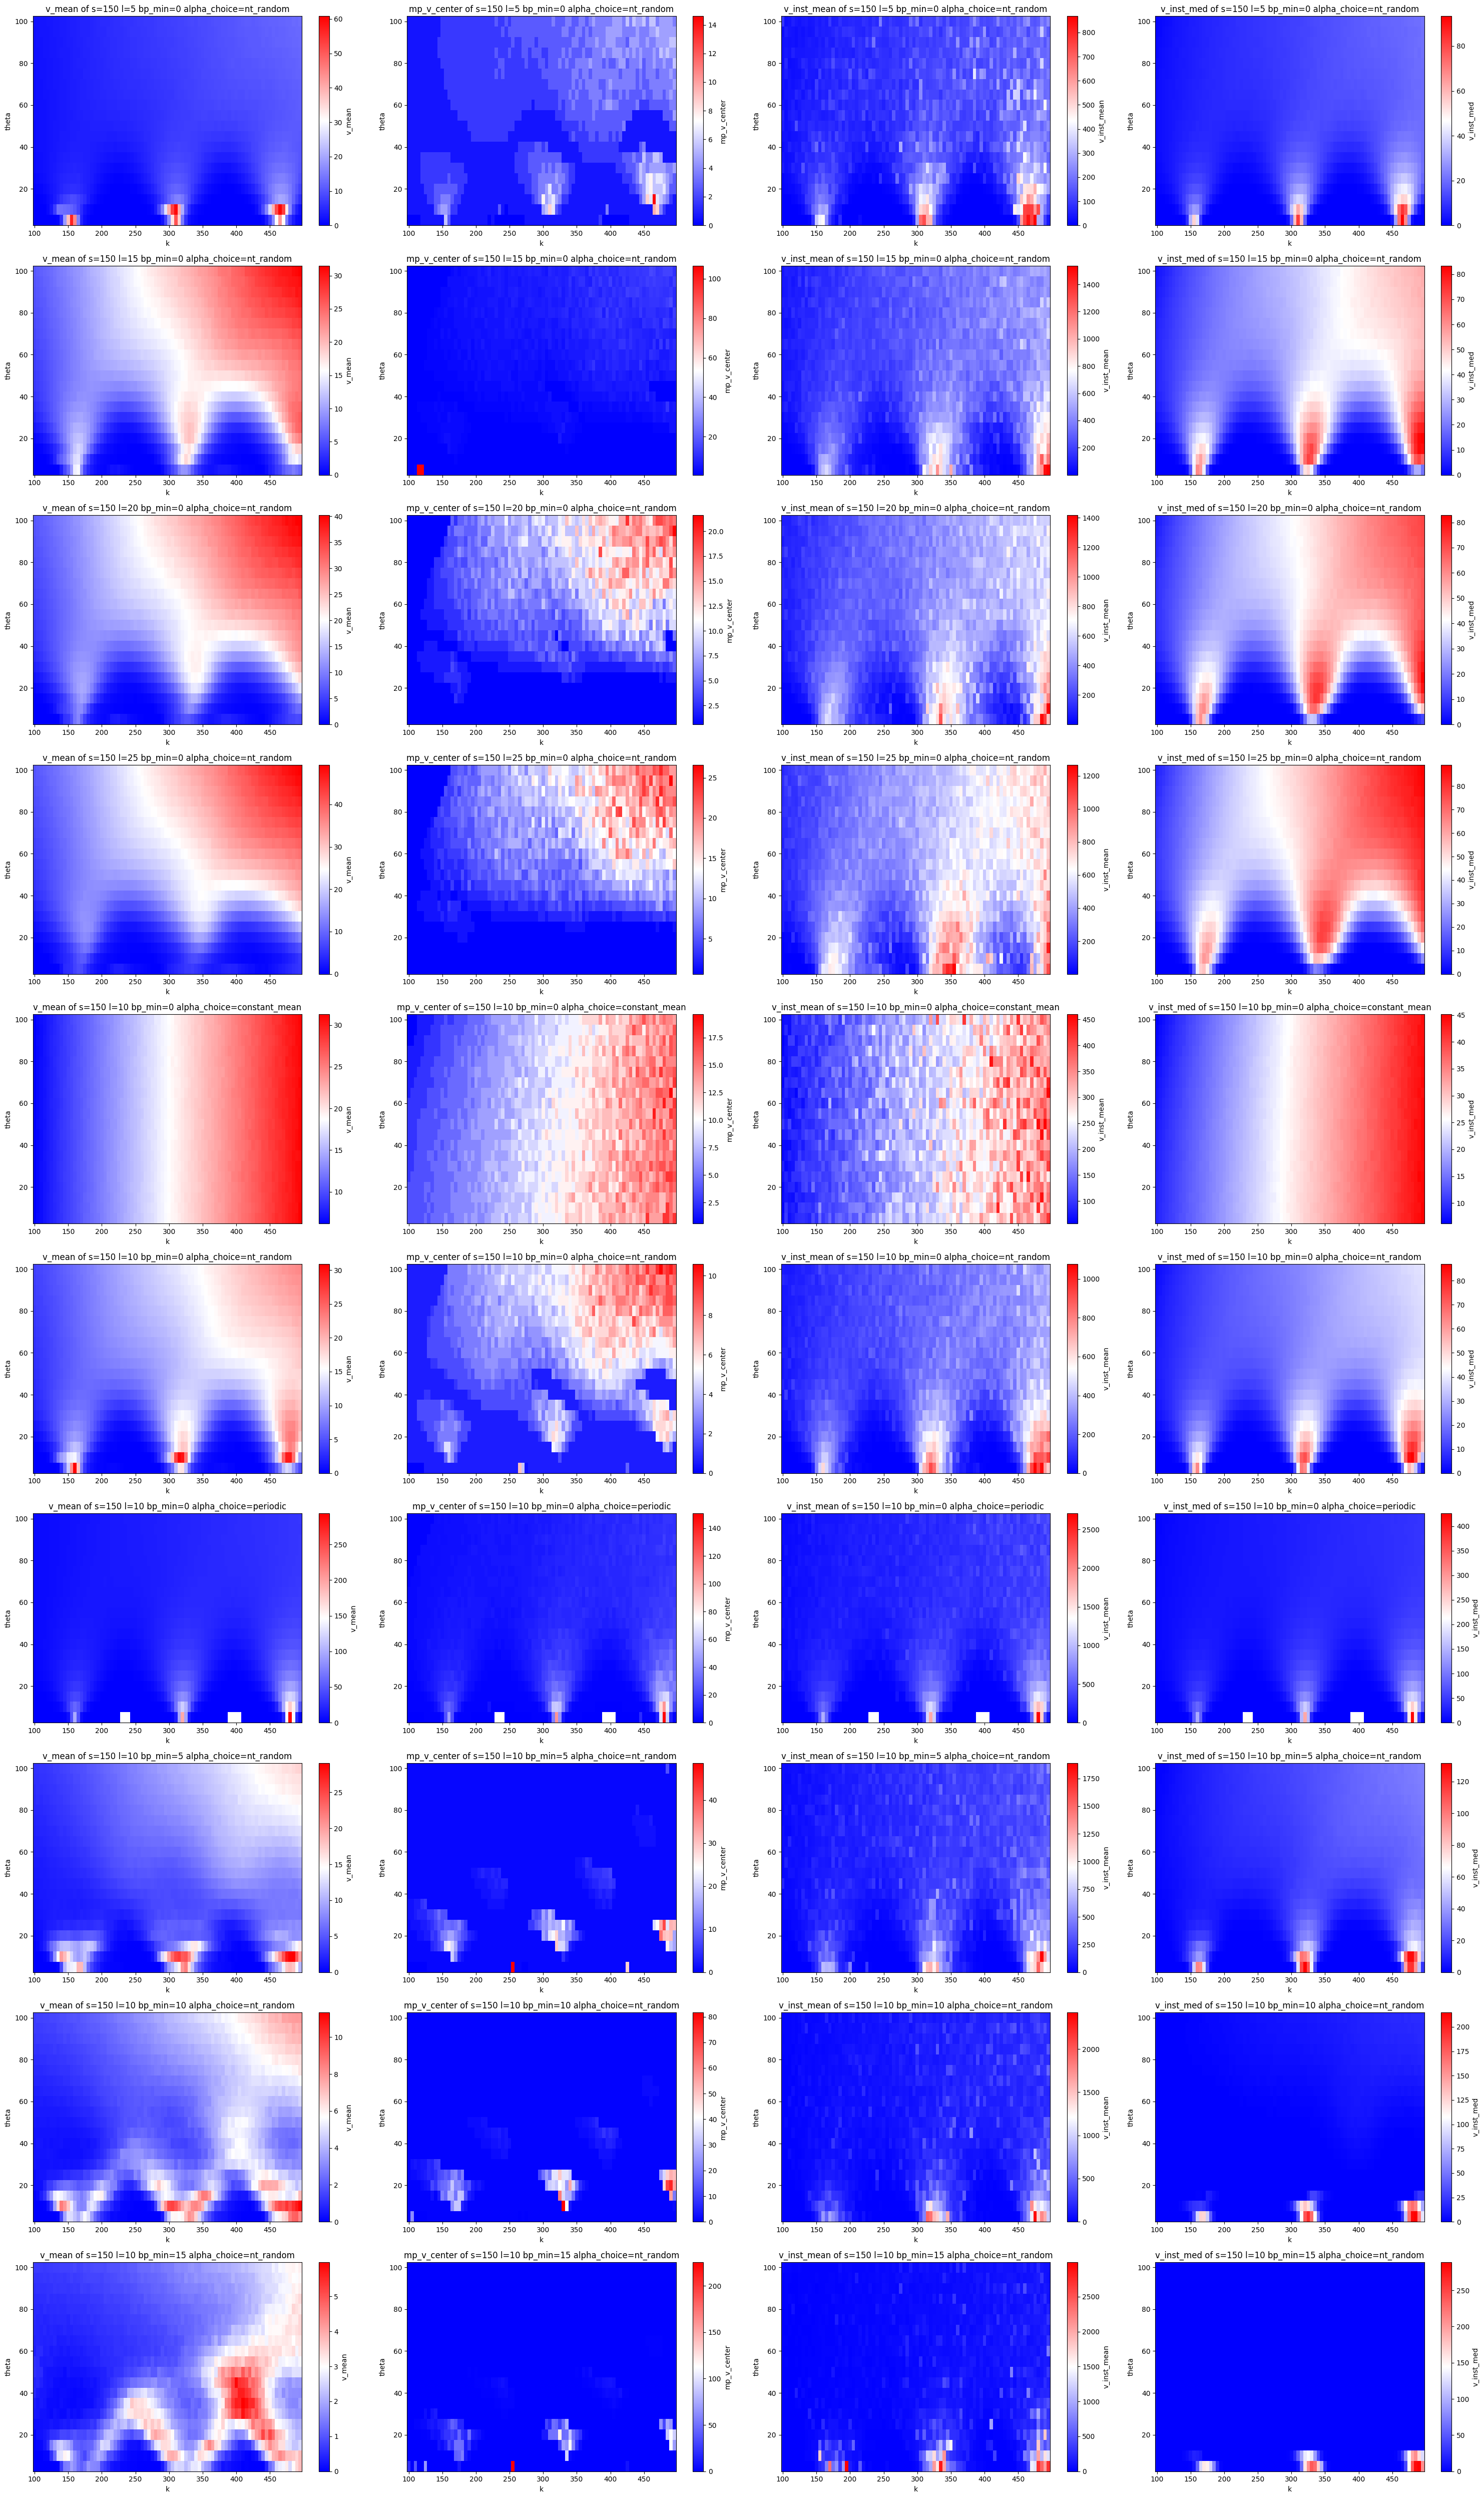

In [8]:
n_combinations = len(sorted_combinations_list)
fig, axes = plt.subplots(nrows=n_combinations, ncols=4, figsize=(30, 5 * n_combinations))

for idx, row in enumerate(sorted_combinations_list):
    s_w, l_w, bp_min_w, alpha_w = row
    # print(f'\n\ns: {s_w}, l: {l_w}, bp_min: {bp_min_w}, alpha_choice: {alpha_w}')
    
    plot_2D(_df_=main_file,
            _s_=s_w,
            _l_=l_w,
            _bp_min_=bp_min_w,
            _alpha_choice_=alpha_w,
            _speed_='v_mean',
            ax=axes[idx, 0])


    plot_2D(_df_=main_file,
            _s_=s_w,
            _l_=l_w,
            _bp_min_=bp_min_w,
            _alpha_choice_=alpha_w,
            _speed_='mp_v_center',
            ax=axes[idx, 1])
    
    plot_2D(_df_=main_file,
            _s_=s_w,
            _l_=l_w,
            _bp_min_=bp_min_w,
            _alpha_choice_=alpha_w,
            _speed_='v_inst_mean',
            ax=axes[idx, 2])
    
    plot_2D(_df_=main_file,
            _s_=s_w,
            _l_=l_w,
            _bp_min_=bp_min_w,
            _alpha_choice_=alpha_w,
            _speed_='v_inst_med',
            ax=axes[idx, 3])

plt.tight_layout()
plt.show()

# Plots : 3D

In [9]:
def plot_3D(_df_, _s_, _l_, _bp_min_, _alpha_choice_):

    _df_filtered_ = _df_[(_df_['s'] == _s_) &
                         (_df_['l'] == _l_) &
                         (_df_['bp_min'] == _bp_min_) &
                         (_df_['alpha_choice'] == _alpha_choice_)]
    
    if _df_filtered_.empty:
        print('\nNo simulations satisfying the variables')
        return None

    df_grouped_v_mean = _df_filtered_.groupby(['k', 'theta'], as_index=False)['v_mean'].mean()
    df_grouped_v_inst_mean = _df_filtered_.groupby(['k', 'theta'], as_index=False)['mp_v_center'].mean()

    k_values = df_grouped_v_mean['k']
    theta_values = df_grouped_v_mean['theta']
    v_mean_values = df_grouped_v_mean['v_mean']
    v_inst_mean_values = df_grouped_v_inst_mean['mp_v_center']

    # Creating subplots: one for v_mean and one for v_inst_mean
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=("v_mean", "mp_v_center"),
        specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]]
    )

    # Trace for v_mean
    trace_v_mean = go.Scatter3d(
        x=k_values,
        y=theta_values,
        z=v_mean_values,
        mode='markers',
        marker=dict(
            size=5,
            color=v_mean_values,
            colorscale='Viridis',
            opacity=0.8
        )
    )

    # Trace for v_inst_mean
    trace_v_inst_mean = go.Scatter3d(
        x=k_values,
        y=theta_values,
        z=v_inst_mean_values,
        mode='markers',
        marker=dict(
            size=5,
            color=v_inst_mean_values,
            colorscale='Plasma',
            opacity=0.8
        )
    )

    # Add traces to the respective subplots
    fig.add_trace(trace_v_mean, row=1, col=1)
    fig.add_trace(trace_v_inst_mean, row=1, col=2)

    # Updating the layout for both subplots
    fig.update_layout(
        title=f'Comparaison v_mean et mp_v_center (s={_s_}, l={_l_}, alpha_choice={_alpha_choice_})',
        width=1200,
        height=600
    )

    # Show the figure
    fig.show()

In [10]:
for idx, row in enumerate(sorted_combinations_list):
    s_w, l_w, bp_min_w, alpha_w = row
    print(f'\n\ns: {s_w}, l: {l_w}, bp_min: {bp_min_w}, alpha_choice: {alpha_w}')

    plot_3D(_df_=main_file,
            _s_=s_w,
            _l_=l_w,
            _bp_min_=bp_min_w,
            _alpha_choice_=alpha_w)
    

# plot_3D(_df_=main_file, _s_=150, _l_=10, _bp_min_=0, _alpha_choice_='nt_random')



s: 150, l: 5, bp_min: 0, alpha_choice: nt_random




s: 150, l: 15, bp_min: 0, alpha_choice: nt_random




s: 150, l: 20, bp_min: 0, alpha_choice: nt_random




s: 150, l: 25, bp_min: 0, alpha_choice: nt_random




s: 150, l: 10, bp_min: 0, alpha_choice: constant_mean




s: 150, l: 10, bp_min: 0, alpha_choice: nt_random




s: 150, l: 10, bp_min: 0, alpha_choice: periodic




s: 150, l: 10, bp_min: 5, alpha_choice: nt_random




s: 150, l: 10, bp_min: 10, alpha_choice: nt_random




s: 150, l: 10, bp_min: 15, alpha_choice: nt_random


# Plot : 1D 

In [3]:
#- Extracting one curve of speed for theta fixed -#
def result_1d_for_one_theta(_df_, _s_, _l_, _bp_min_, _alpha_choice_, _theta_, _speed_):
    """We're getting the information that we want for one configurations in function of k for theta fixed

    Args:
        _df_ (_type_): data_frame studied
        _s_ (_type_): nucleosome size
        _l_ (_type_): inter-nucleosomal distance
        _bp_min_ (_type_): minimal binding size of condensin
        _alpha_choice_ (_type_): nucleosomal scenario
        _axis_ (_type_): k or theta
        _speed_ (_type_): v_mean or mp_v_center

    Returns:
        _df_grouped : data frame organized as we wanted
    """

    _df_filtered_ = _df_[(_df_['s'] == _s_) &
                         (_df_['l'] == _l_) &
                         (_df_['bp_min'] == _bp_min_) &
                         (_df_['alpha_choice'] == _alpha_choice_) &
                         (_df_['theta'] == _theta_)]
    
    title_result = f's{_s_}_l{_l_}_bpmin{_bp_min_}_alpha{_alpha_choice_}_theta{_theta_}'
    
    if _df_filtered_.empty:
        print('\nNo simulations satisfying the variables')
        return None

    else:
        df_grouped = _df_filtered_.groupby('k', as_index=False)[[str(_speed_), 'err_v']].mean()
        return (np.array(df_grouped['k']), 
                np.array(df_grouped[str(_speed_)]), 
                np.array(df_grouped['err_v']),
                title_result)
#- -#



#- Extracting one curve of speed for k fixed -#
def result_1d_for_one_k(_df_, _s_, _l_, _bp_min_, _alpha_choice_, _k_, _speed_):
    """We're getting the information that we want for one configurations in function of theta for k fixed

    Args:
        _df_ (_type_): data_frame studied
        _s_ (_type_): nucleosome size
        _l_ (_type_): inter-nucleosomal distance
        _bp_min_ (_type_): minimal binding size of condensin
        _alpha_choice_ (_type_): nucleosomal scenario
        _axis_ (_type_): k or theta
        _speed_ (_type_): v_mean or mp_v_center

    Returns:
        _df_grouped : data frame organized as we wanted
    """

    _df_filtered_ = _df_[(_df_['s'] == _s_) &
                         (_df_['l'] == _l_) &
                         (_df_['bp_min'] == _bp_min_) &
                         (_df_['alpha_choice'] == _alpha_choice_) &
                         (_df_['k'] == _k_)]
    
    title_result = f's{_s_}_l{_l_}_bpmin{_bp_min_}_alpha{_alpha_choice_}_k{_k_}'
    
    if _df_filtered_.empty:
        print('\nNo simulations satisfying the variables')
        return None

    else:
        df_grouped = _df_filtered_.groupby('theta', as_index=False)[[str(_speed_), 'err_v']].mean()
        return (np.array(df_grouped['theta']), 
                np.array(df_grouped[str(_speed_)]), 
                np.array(df_grouped['err_v']),
                title_result)
#- -#

In [4]:
#- Theta fixed : in function of k
def plot_1d_for_one_theta(_df_, _s_, _l_, _bp_min_, _alpha_choice_, _theta_, _speed_, _ax_):

    data_k, data_v, data_err, title_fig_test = result_1d_for_one_theta(_df_=_df_, _s_=_s_, _l_=_l_, _bp_min_=_bp_min_, _alpha_choice_=_alpha_choice_, _theta_=_theta_, _speed_=_speed_)
    l_fit, o_fit = np.polyfit(data_k, data_v, 1)
    l_fit = np.round(l_fit, 3)
    
    _ax_.set_title(title_fig_test)
    _ax_.plot(data_k, data_v, label='datas', c='b')
    _ax_.plot(data_k, l_fit * data_k + o_fit, label=f'linear_fit={l_fit}', ls='--', c='r')
    _ax_.grid('True')
    _ax_.set_xlabel('k')
    _ax_.set_ylabel(str(_speed_))
    _ax_.legend()
    
    return None
#-


#- k fixed : in function of theta
def plot_1d_for_one_k(_df_, _s_, _l_, _bp_min_, _alpha_choice_, _k_, _speed_, _ax_):

    data_k, data_v, data_err, title_fig_test = result_1d_for_one_k(_df_=_df_, _s_=_s_, _l_=_l_, _bp_min_=_bp_min_, _alpha_choice_=_alpha_choice_, _k_=_k_, _speed_=_speed_)
    l_fit, o_fit = np.polyfit(data_k, data_v, 1)
    l_fit = np.round(l_fit, 3)
    
    _ax_.set_title(title_fig_test)
    _ax_.plot(data_k, data_v, label='datas', c='b')
    _ax_.plot(data_k, l_fit * data_k + o_fit, label=f'linear_fit={l_fit}', ls='--', c='r')
    _ax_.grid('True')
    _ax_.set_xlabel('theta')
    _ax_.set_ylabel(str(_speed_))
    _ax_.legend()
    
    return None
#-


#- Big subplot
def plot_combined(_df_, _s_, _l_, _bp_min_, _alpha_choice_, _theta_, _k_, _choice_):
    
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 3))
    
    if _choice_ == 'theta' :
        plot_1d_for_one_theta(_df_, _s_, _l_, _bp_min_, _alpha_choice_, _theta_, _speed_='v_mean', _ax_=axs[0])
        plot_1d_for_one_theta(_df_, _s_, _l_, _bp_min_, _alpha_choice_, _theta_, _speed_='mp_v_center', _ax_=axs[1])
        plot_1d_for_one_theta(_df_, _s_, _l_, _bp_min_, _alpha_choice_, _theta_, _speed_='v_inst_mean', _ax_=axs[2])
        plot_1d_for_one_theta(_df_, _s_, _l_, _bp_min_, _alpha_choice_, _theta_, _speed_='v_inst_med', _ax_=axs[3])
    
    if _choice_ == 'k' :
        plot_1d_for_one_k(_df_, _s_, _l_, _bp_min_, _alpha_choice_, _k_, _speed_='v_mean', _ax_=axs[0])
        plot_1d_for_one_k(_df_, _s_, _l_, _bp_min_, _alpha_choice_, _k_, _speed_='mp_v_center', _ax_=axs[1])
        plot_1d_for_one_k(_df_, _s_, _l_, _bp_min_, _alpha_choice_, _k_, _speed_='v_inst_mean', _ax_=axs[2])
        plot_1d_for_one_k(_df_, _s_, _l_, _bp_min_, _alpha_choice_, _k_, _speed_='v_inst_med', _ax_=axs[3])


    plt.tight_layout()
    plt.show()
#-

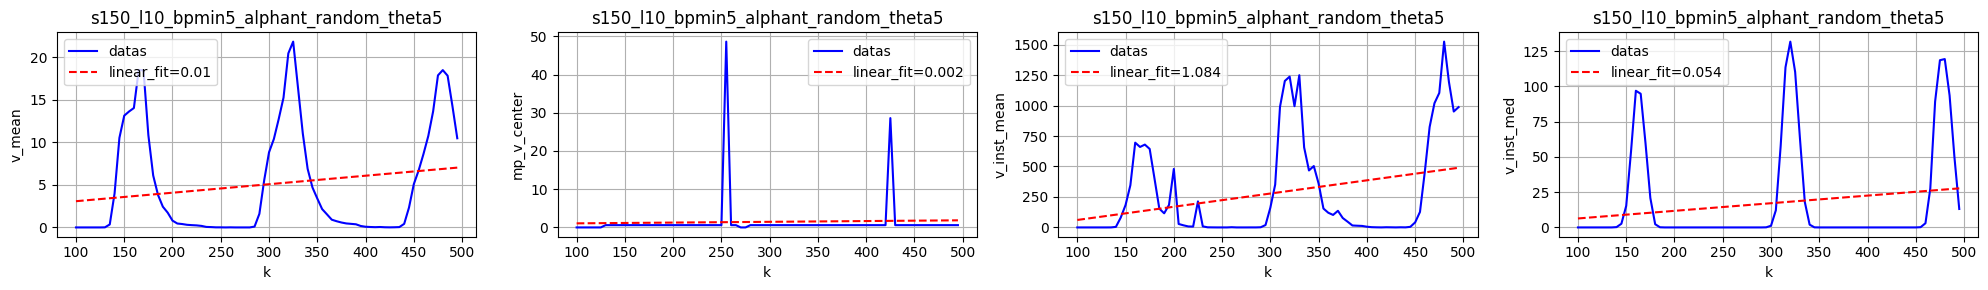

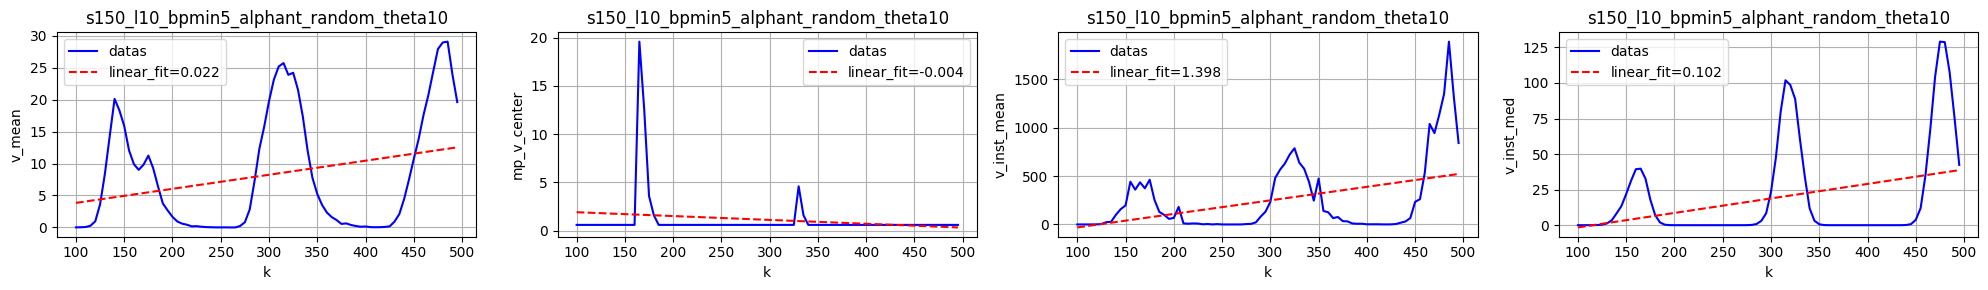

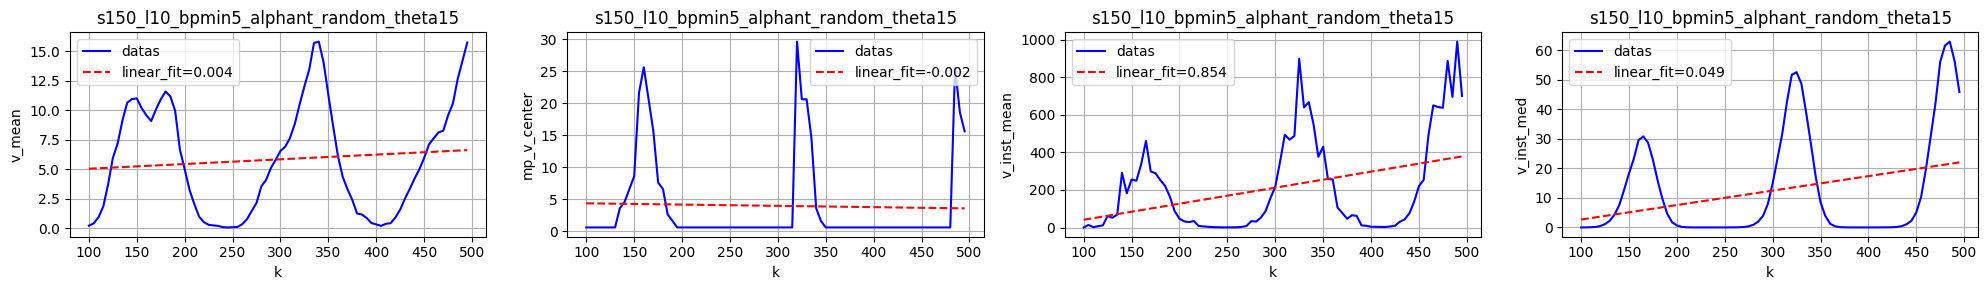

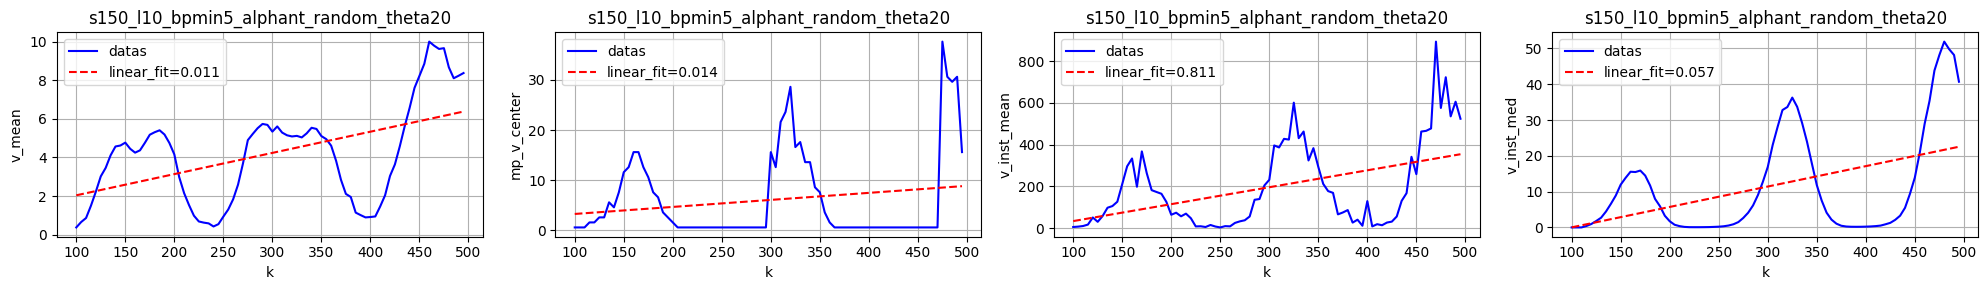

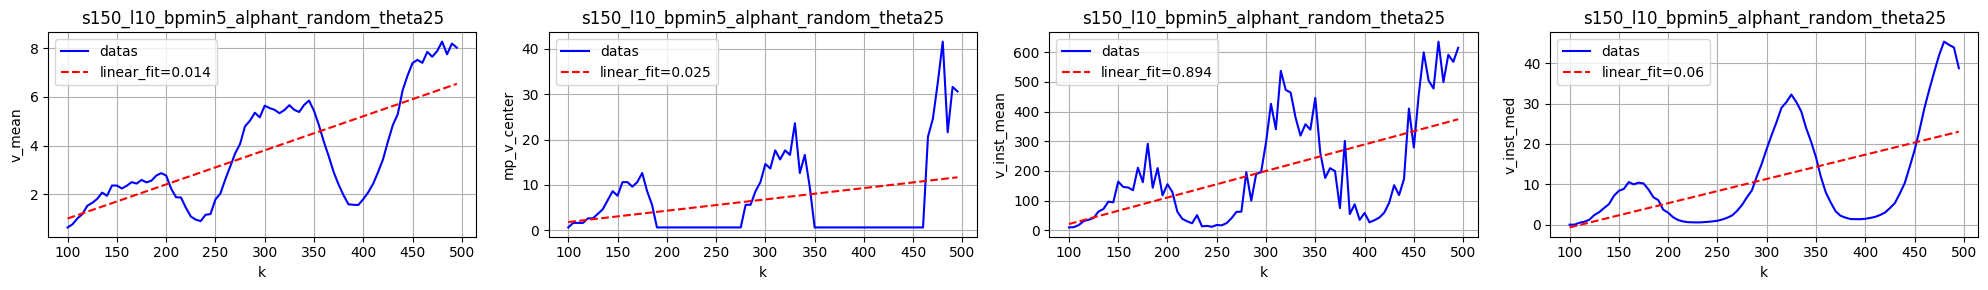

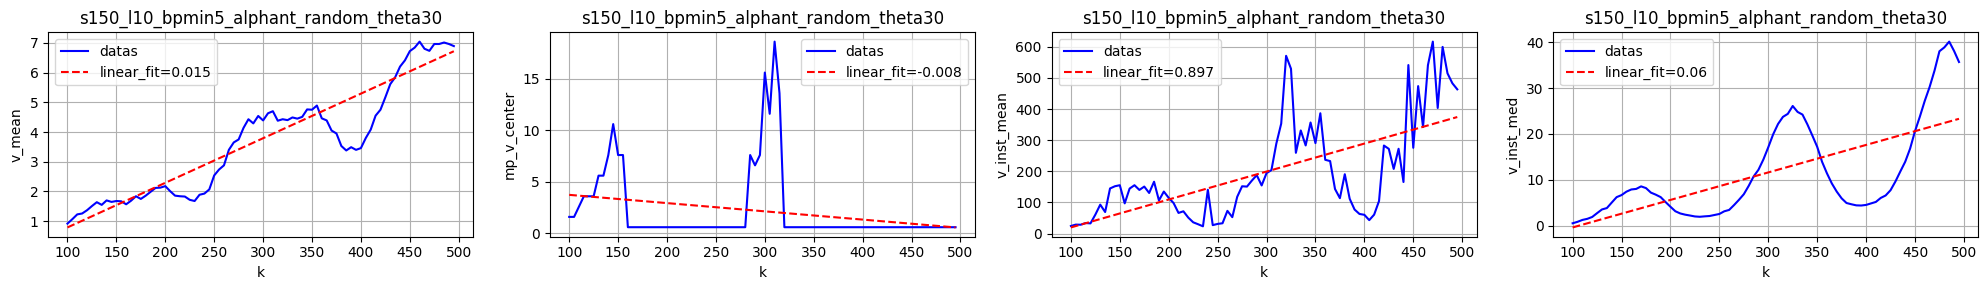

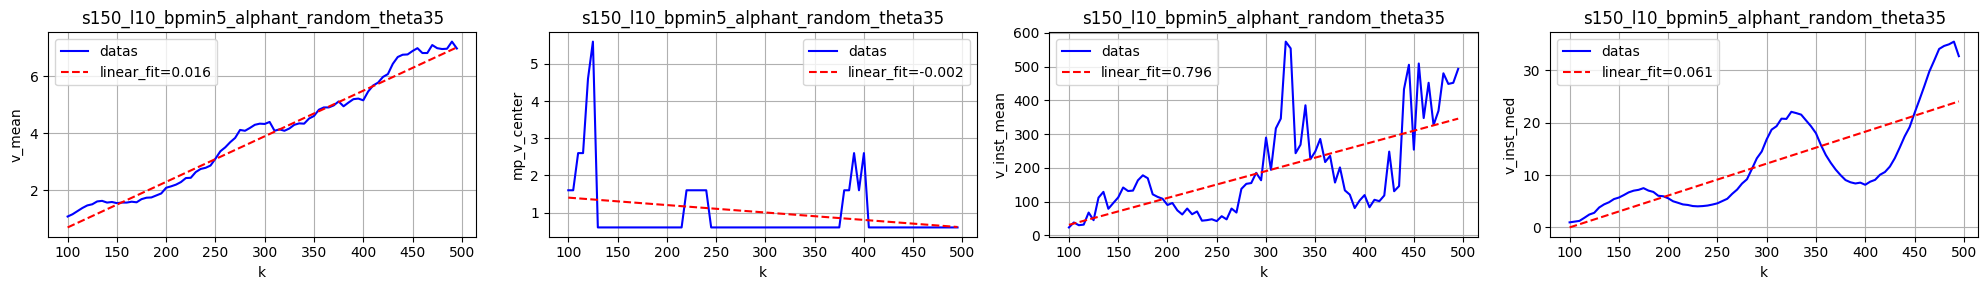

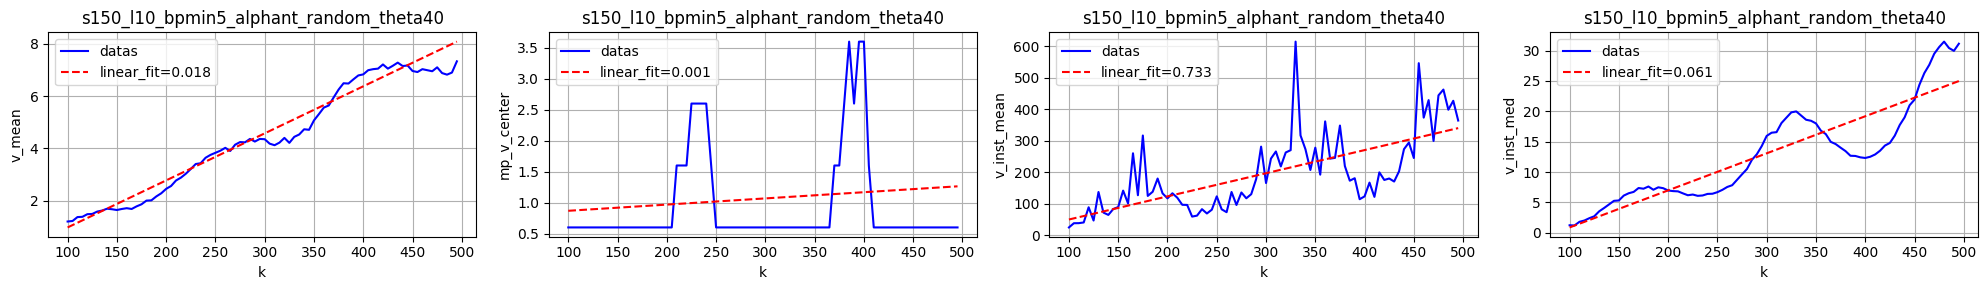

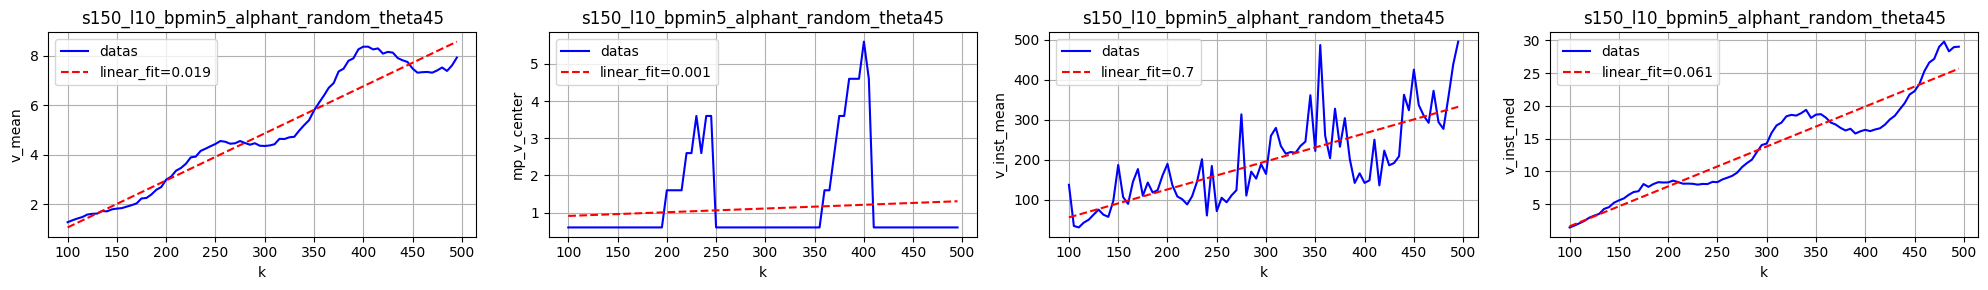

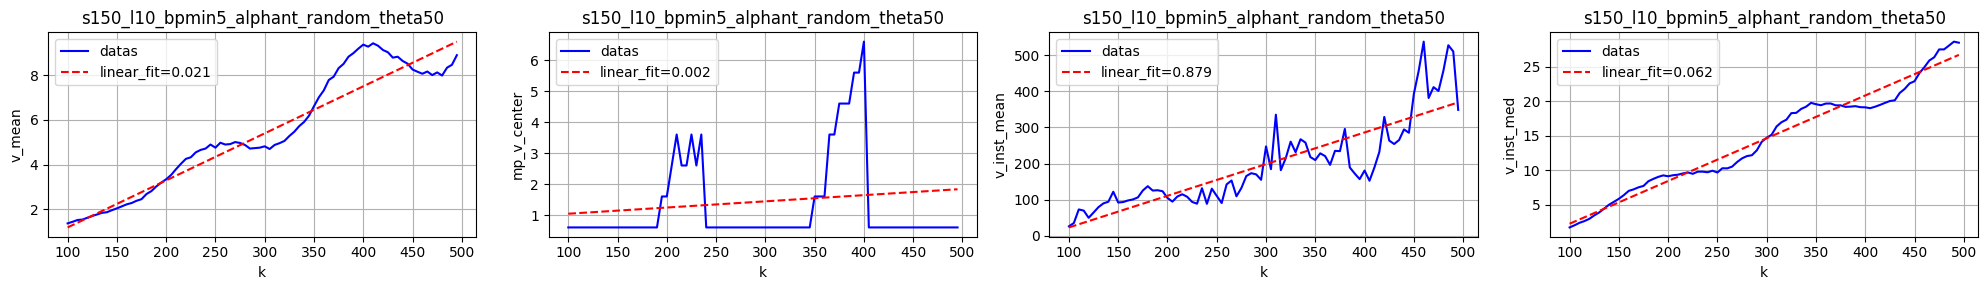

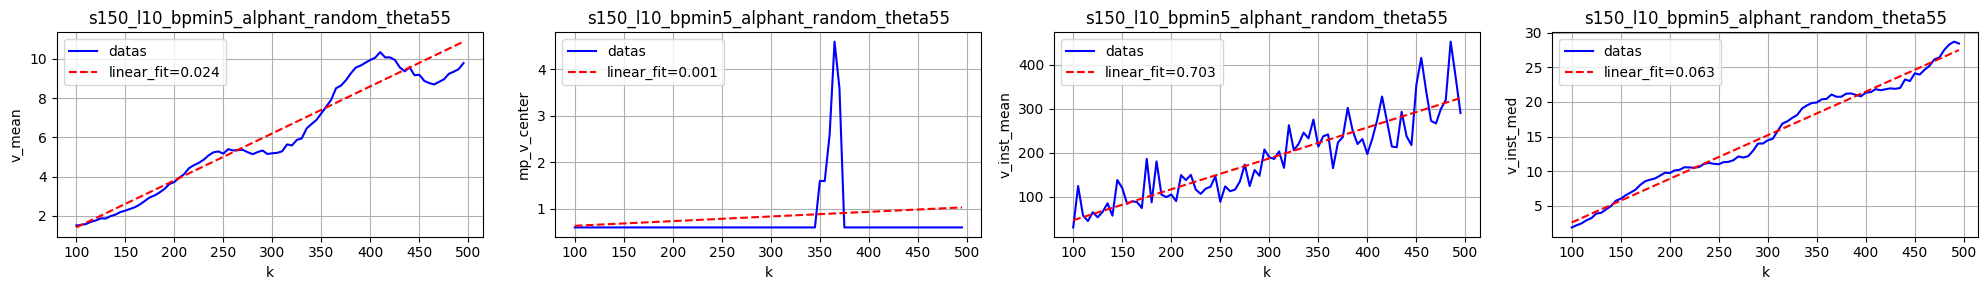

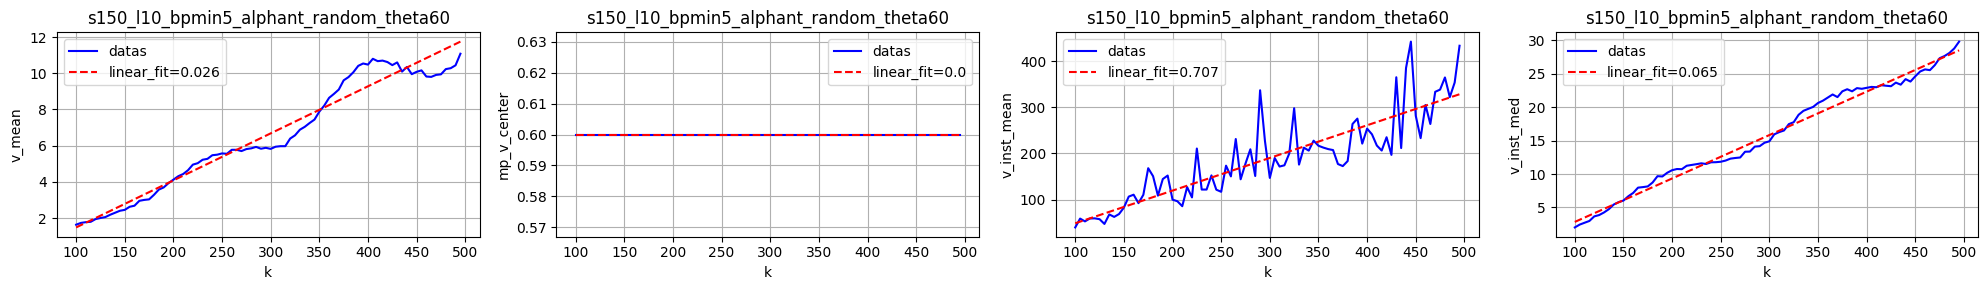

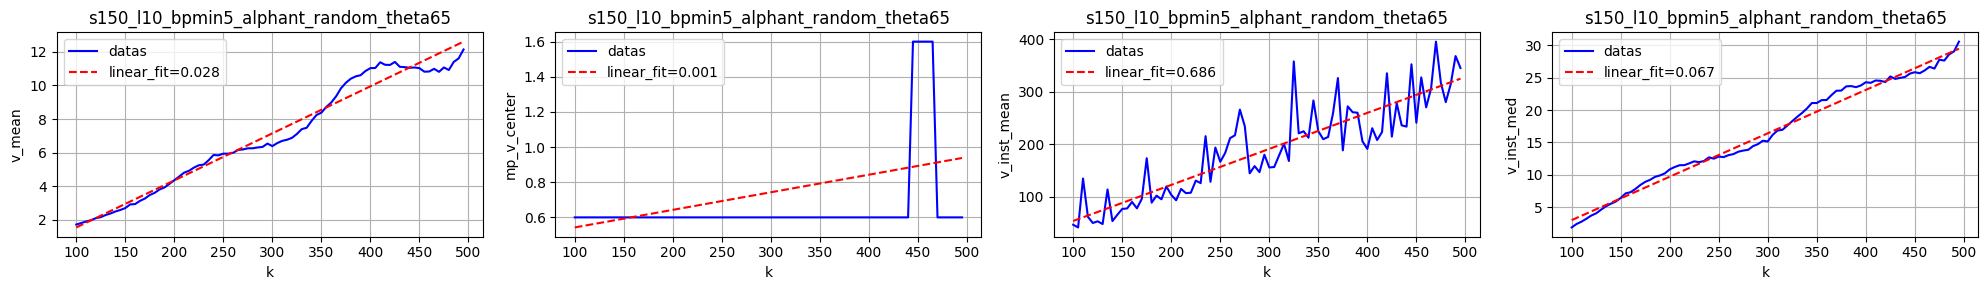

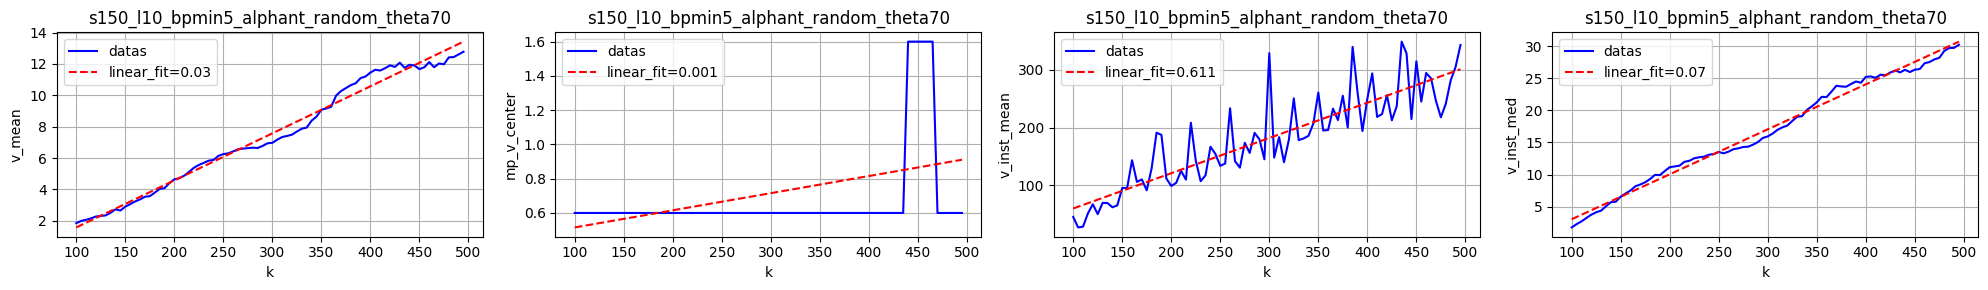

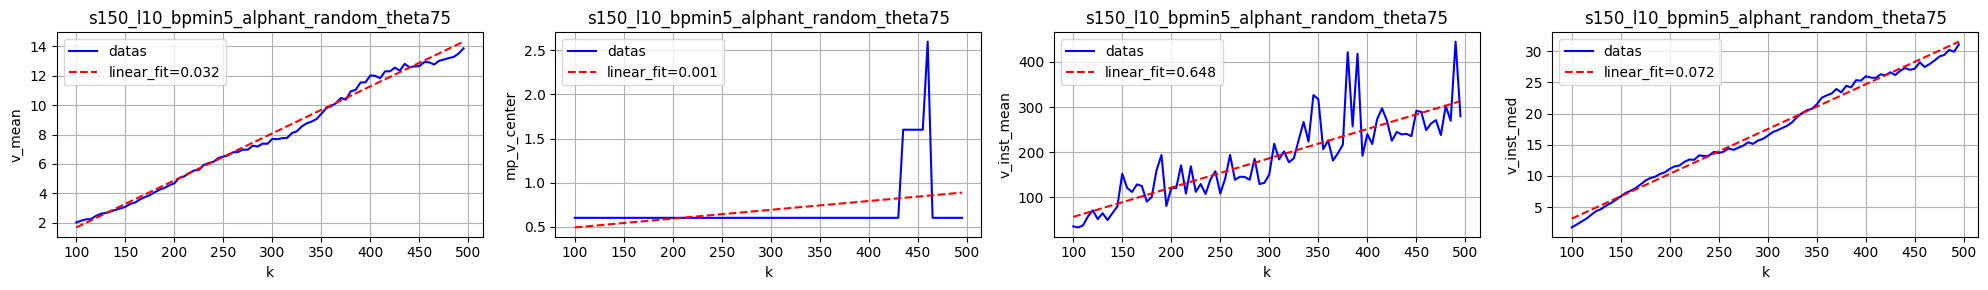

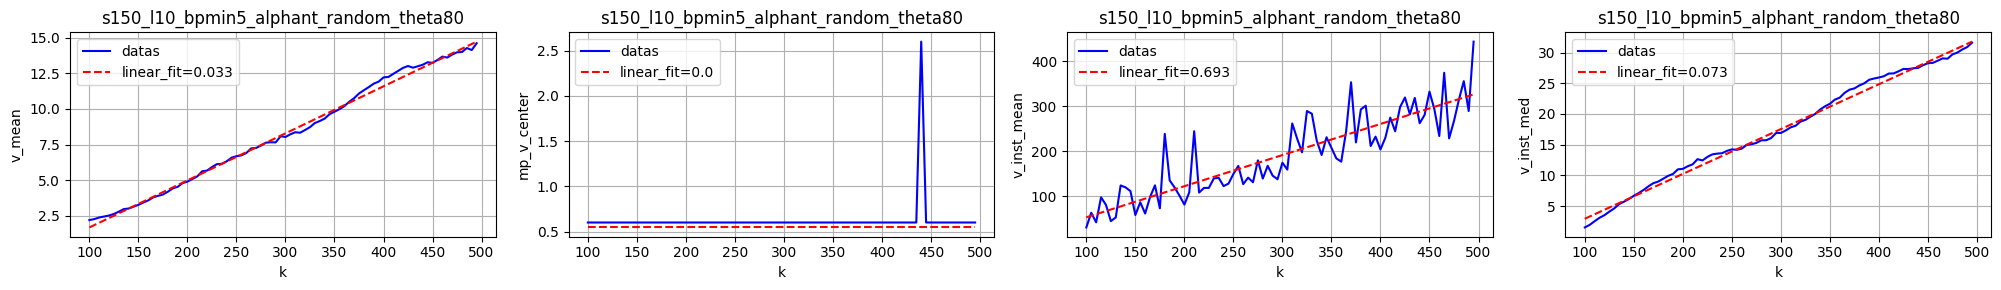

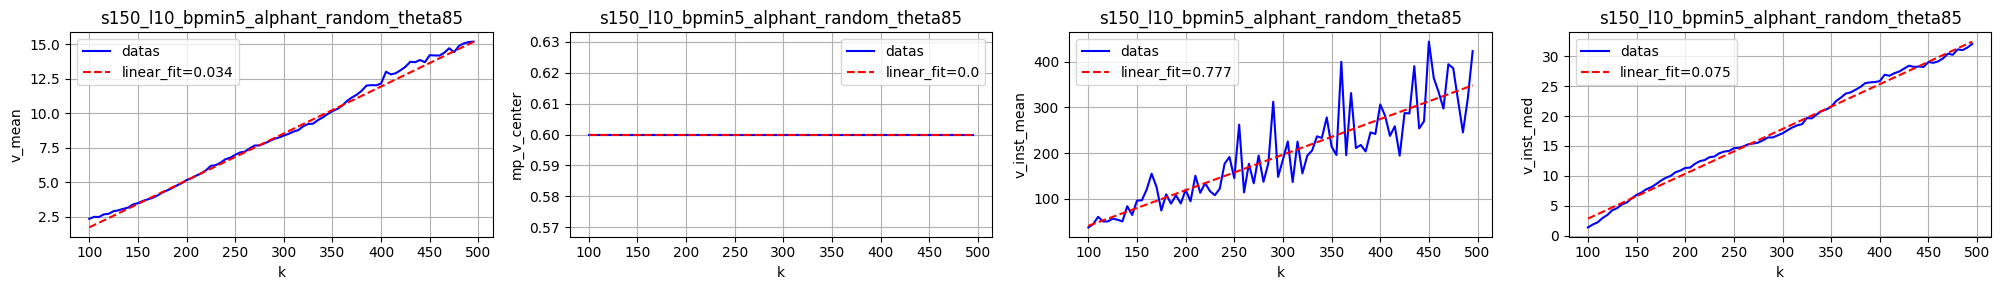

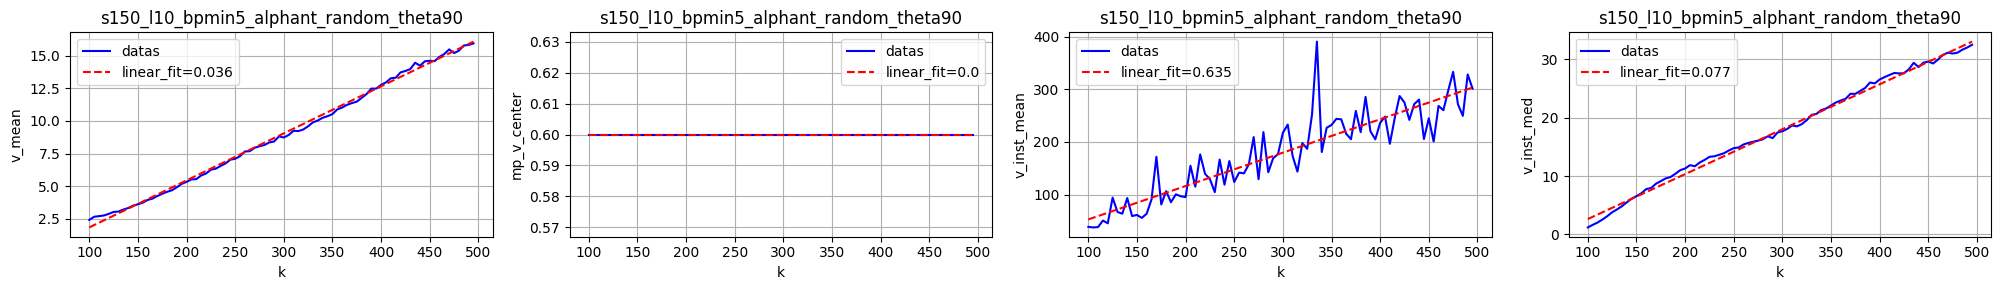

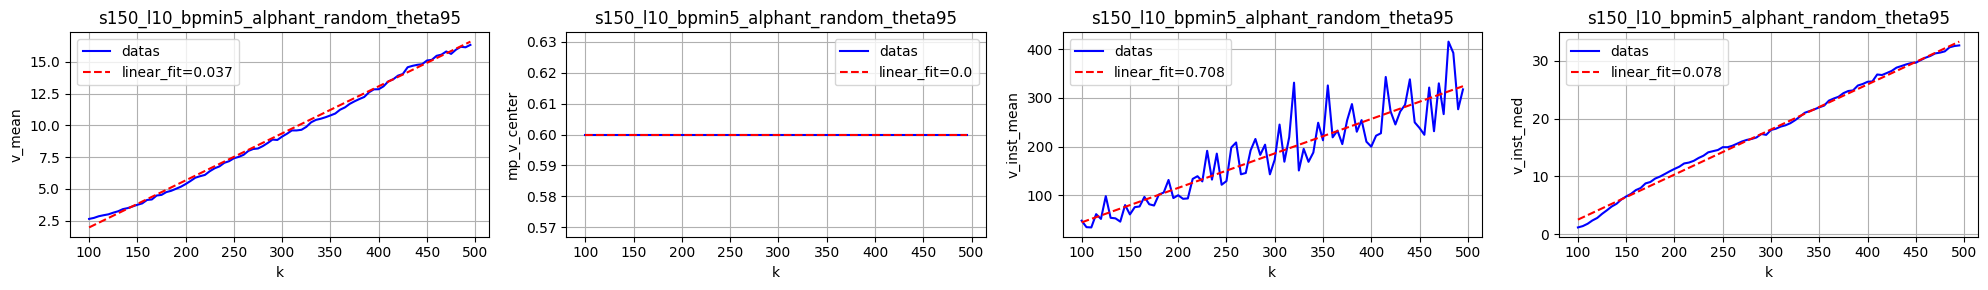

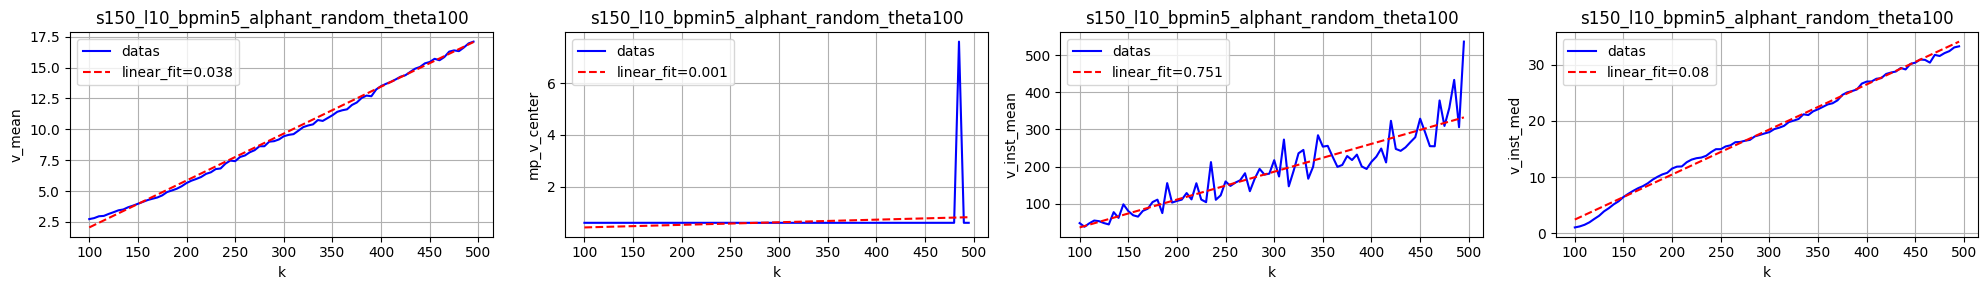

In [12]:
#---- Study ----#-- w for wanted
s_w = 150                                               # Nucleosome size
l_w = 10                                                # Binding size
bp_min_w = 5                                            # Minimum binding size for chromatin
alpha_w = 'nt_random'                                   # Scenarios
theta_w = np.arange(5,105,5)
k_w = np.arange(100,500,50)
#----   ----#


#- Tests
# plot_1d_for_one_theta(_df_=main_file, _s_=s_w, _l_=l_w, _bp_min_=bp_min_w, _alpha_choice_=alpha_w, _theta_=theta_w, _speed_=v_w)
# plot_1d_for_one_k(_df_=main_file, _s_=s_w, _l_=l_w, _bp_min_=bp_min_w, _alpha_choice_=alpha_w, _k_=k_w, _speed_=v_w)
# plot_combined(_df_=main_file, _s_=s_w, _l_=l_w, _bp_min_=bp_min_w, _alpha_choice_=alpha_w, _theta_=theta_w, _k_=k_w)

for index, theta in enumerate(theta_w):
    plot_combined(_df_=main_file, _s_=s_w, _l_=l_w, _bp_min_=bp_min_w, _alpha_choice_=alpha_w, _theta_=theta, _k_=k_w, _choice_='theta')
    
# for index, k in enumerate(k_w):
#     plot_combined(_df_=main_file, _s_=s_w, _l_=l_w, _bp_min_=bp_min_w, _alpha_choice_=alpha_w, _theta_=theta_w, _k_=k, _choice_='k')

# Plot : 1 config per 1 config

In [150]:
#-- Obstacles plot --#
def plot_for_obs_and_links(_dict_obs_, _dict_linker_, _title_0_, _title_size_, _x_size_, _y_size_, _legend_size_, _saving_, _ax_):
    fig_obs = plt.figure(figsize=(8, 6), num='obs_and_link')
    title_obs_disp = 'obs_and_link_distribution' + _title_0_
    _ax_.set_title(title_obs_disp, fontsize=_title_size_)
    _ax_.plot(np.arange(len(_dict_obs_)), _dict_obs_, label='obstacles', color='b', alpha=0.7)
    # _ax_.scatter(np.arange(len(_dict_obs_)), _dict_obs_, label='obstacles', color='b', marker ='+')
    _ax_.plot(np.arange(len(_dict_linker_)), _dict_linker_, label='linkers', color='r', alpha=0.7)
    # _ax_.scatter(np.arange(len(_dict_linker_)), _dict_linker_, label='linkers', color='r', marker ='+')
    _ax_.set_xlabel('bp', fontsize=_x_size_)
    _ax_.set_ylabel('distribution', fontsize=_y_size_)
    _ax_.grid(True)
    _ax_.legend(fontsize=_legend_size_, loc='upper right')

    if _saving_ :
        savepath = os.path.join(_title_0_, title_obs_disp + '.png')
        plt.savefig(savepath)
        plt.close(fig_obs)
    if _ax_ == 0 :
        plt.show()

    return None
#--   --#



#-- Probabilities plot --#
def plot_for_probabilities(_alpha_list_mean_, _P_, _title_0_, _title_size_, _x_size_, _y_size_, _legend_size_, _saving_, _ax_):
    fig_proba = plt.figure(figsize=(8, 6), num='probabilities')
    title_proba = 'probabilities__' + _title_0_
    _ax_.set_title(title_proba, fontsize=_title_size_)
    _ax_.plot(np.arange(0, len(_alpha_list_mean_[10000:11000]), 1), _alpha_list_mean_[10000:11000], color='b', label='mean_obstacle')
    _ax_.plot(np.arange(0, len(_P_[0:1000]), 1), _P_[0:1000], 'r-', lw=2, label='jump_probability')
    _ax_.set_xlabel('x_in_bp', fontsize=_x_size_)
    _ax_.set_ylabel('p__x_k_theta', fontsize=_y_size_)
    _ax_.set_xlim(0, 1e3)
    _ax_.grid(True)
    _ax_.legend(fontsize=_legend_size_, loc='upper right')
    
    if _saving_ :
        savepath = os.path.join(_title_0_, title_proba + '.png')
        plt.savefig(savepath)
        plt.close(fig_proba)
    if _ax_ == 0 :
        plt.show()
    
    return None
#--   --#



#-- Trajectories plot --#
def plot_for_trajectories(_mean_results_, _v_mean_, _vo_, _err_v_, _std_gill_, _title_0_, _title_size_, _x_size_, _y_size_, _legend_size_, _saving_, _ax_):
    fig_traj = plt.figure(figsize=(8, 6), num='trajectories')
    
    # for n in range(len(_results_)):
    #     plt.step(np.arange(1, _t_max_ + 1, 1), _results_[n], lw=0.2, c='b')

    title_trajectories = 'trajectories__' + _title_0_
    _ax_.set_title(title_trajectories, fontsize=_title_size_)
    # plt.axhline(y=L_max_- int(2 * _origin_), color='grey', linestyle='--', label=f'perturbations {_L_max_ - int(2 * _origin_)} [bp]')
    # plt.axvline(x=_t_max_, color='grey', linestyle=':', label=f't_max {_t_max_} [s]')
    # plt.plot(np.arange(1, len(_mean_results_)+1, 1), _mean_results_, c='b', label=f'mean_trajectory')
    _ax_.errorbar(x=np.arange(1, len(_mean_results_)+1, 1), y=_mean_results_, yerr=_std_gill_, c='b', label=f'mean_trajectory', lw=0.8)
    _ax_.errorbar(x=np.arange(1, len(_mean_results_) + 1, 1), y=np.round(_v_mean_, 2) * np.arange(0, len(_mean_results_), 1) + _vo_, yerr=_err_v_ ,label=f'linear_speed v_mean: {_v_mean_} __ err_v: {_err_v_}', ls='--', c='r')
    _ax_.set_xlabel(f't_in_s', fontsize=_x_size_)
    _ax_.set_ylabel('x_in_bp', fontsize=_y_size_)
    _ax_.grid(True)
    _ax_.legend(fontsize=_legend_size_, loc='upper left')
    
    if _saving_ :
        savepath = os.path.join(_title_0_, title_trajectories + '.png')
        plt.savefig(savepath)
        plt.close(fig_traj)
    if _ax_ == 0 :
        plt.show()

    return None
#--   --#



#-- Time between jumps --#
def plot_for_jump_distribution(_jt_bj_hist_, _v_mean_, _title_0_, _title_size_, _x_size_, _y_size_, _legend_size_, _saving_, _ax_):
    
    fig_hist_jump = plt.figure(figsize=(8, 6), num='jump_distrib')
    title_jumps = 'time_between_jumps_hist__' + _title_0_
    _ax_.set_title(title_jumps, fontsize=_title_size_)
    _ax_.set_xlabel('t_in_s', fontsize=_x_size_)
    _ax_.set_ylabel('density', fontsize=_y_size_)
    
    if _v_mean_ != 0:
        _ax_.set_xscale('log')
        _ax_.set_yscale('log')
        
    _ax_.plot(np.arange(len(_jt_bj_hist_)), _jt_bj_hist_, 'r-', label='data')
    _ax_.legend(fontsize=_legend_size_, loc='upper right')
    _ax_.grid(True)
    
    if _saving_ :
        savepath = os.path.join(_title_0_, title_jumps + '.png')
        plt.savefig(savepath)
        plt.close(fig_hist_jump)
    if _ax_ == 0 :
        plt.show()

    return None
#--   --#



#--   --#
def plot_for_fpt_distribution(_fpt_results_, _fpt_number_, _fpt_bins_, _title_0_, _title_size_, _x_size_, _y_size_, _L_max_, _origin_, _n_t_, _t_max_, _saving_, _ax_):
    title_hist_fpt = 'first_pass_time__' + _title_0_

    # Initialization
    subfig = plt.figure(figsize=(6, 4))
    sub_ax1 = subfig.add_subplot(211)
    sub_ax2 = subfig.add_subplot(212)

    # Subplot 1 : Histograms of first pass time (FPTs)
    sub_ax1.set_title('Histogram', fontsize=_title_size_)
    sub_ax1.set_xlabel('x_in_bp', fontsize=_x_size_)
    sub_ax1.set_ylabel('t_in_s', fontsize=_y_size_)
    sub_ax1.imshow(_fpt_results_, aspect='auto', origin='lower', cmap='bwr', vmin=0, vmax=0.01)
    sub_ax1.set_xlim(0, int(_L_max_ - 2 * _origin_)//_fpt_bins_)
    sub_ax1.set_ylim(0, int(_t_max_))
    sub_ax1.grid(True)

    # Subplot 2 : Number of trajectories that reached the positions
    sub_ax2.set_title('Number of Trajectories', fontsize=_title_size_)
    sub_ax2.set_xlabel('x_in_bp', fontsize=_x_size_)
    sub_ax2.set_ylabel('n', fontsize=_y_size_)
    sub_ax2.plot(_fpt_number_, c='b')
    sub_ax2.set_xlim(0, int(_L_max_ - 2 * _origin_)//_fpt_bins_)
    sub_ax2.set_ylim(0, _n_t_)
    sub_ax2.grid(True)

    # Conversion in picture
    canvas = FigureCanvas(subfig)
    canvas.draw() # Memory
    
    # RGB type
    img = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
    img = img.reshape(canvas.get_width_height()[::-1] + (3,))

    # Placing the picture in the proper axis
    _ax_.imshow(img)
    _ax_.axis('off')


    if _saving_:
        savepath = os.path.join(_title_0_, title_hist_fpt + '.png')
        plt.savefig(savepath)
    if _ax_ == 0 :
        plt.show()
        
    plt.close(subfig)

    return None
#--   --#




#-- Instanteneous speeds plots --#
def plot_for_instantaneous_speeds(_bin_centers_, _speed_hist_, _v_inst_mean_, _v_inst_med_, _mp_v_center_, _title_0_, _title_size_, _x_size_, _y_size_, _legend_size_, _saving_, _ax_):
    fig_hist_speeds = plt.figure(figsize=(8, 6), num='speeds')
    title_speeds = 'speed_hists__' + _title_0_
    _ax_.set_title(title_speeds, fontsize=_title_size_)
    _ax_.plot(_bin_centers_, _speed_hist_, color='b')
    # plt.plot(_bin_centers_, _speed_hist_, 'b-', label='distribution_plot')
    _ax_.axvline(x=_v_inst_mean_, c='r', ls=':', label=f'v_mean:{_v_inst_mean_:.2f}')
    _ax_.axvline(x=_v_inst_med_, c='r', ls='--', label=f'v_med:{_v_inst_med_:.2f}')
    _ax_.axvline(x=_mp_v_center_, c='r', ls='-.', label=f'v_most_probable:{_mp_v_center_:.2f}')
    _ax_.set_xlabel('speeds', fontsize=_x_size_)
    _ax_.set_ylabel('density', fontsize=_y_size_)

    # if (_speed_hist_ > _epsilon_).all():
    #     plt.xscale('log')
        
    _ax_.set_xscale('log')
    _ax_.set_yscale('log')
    _ax_.set_xlim(1e-1, 1e5)
    _ax_.grid(True)
    _ax_.legend(fontsize=_legend_size_, loc='upper right')
    
    if _saving_ :
        savepath = os.path.join(_title_0_, title_speeds + '.png')
        plt.savefig(savepath)
        plt.close(fig_hist_speeds)
    if _ax_ == 0 :
        plt.show()

    return None
#--   --#

     s   l  bp_min alpha_choice    k  theta  origin  L_max    N    n_t  ...  \
0  150  10       5    nt_random  500     70   10000  50000  312  10000  ...   

    err_v                                         jt_bj_hist fpt_bin  \
0  0.1383  [0.0709, 0.0634, 0.0558, 0.0503, 0.0472, 0.042...      10   

                                         fpt_results  \
0  [[0.0602, 0.0602, 0.0602, 0.0602, 0.0602, 0.06...   

                                          fpt_number  \
0  [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, ...   

                                          speed_hist  \
0  [0.044, 0.0219, 0.0193, 0.0185, 0.0171, 0.016,...   

                                         bin_centers  v_inst_mean  v_inst_med  \
0  [1.1, 3.1, 5.1, 7.1, 9.1, 11.1, 13.1, 15.1, 17...     415.0656     30.7822   

  mp_v_center  
0         1.1  

[1 rows x 28 columns]


/tmp/ipykernel_72877/947577106.py:144: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  img = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')


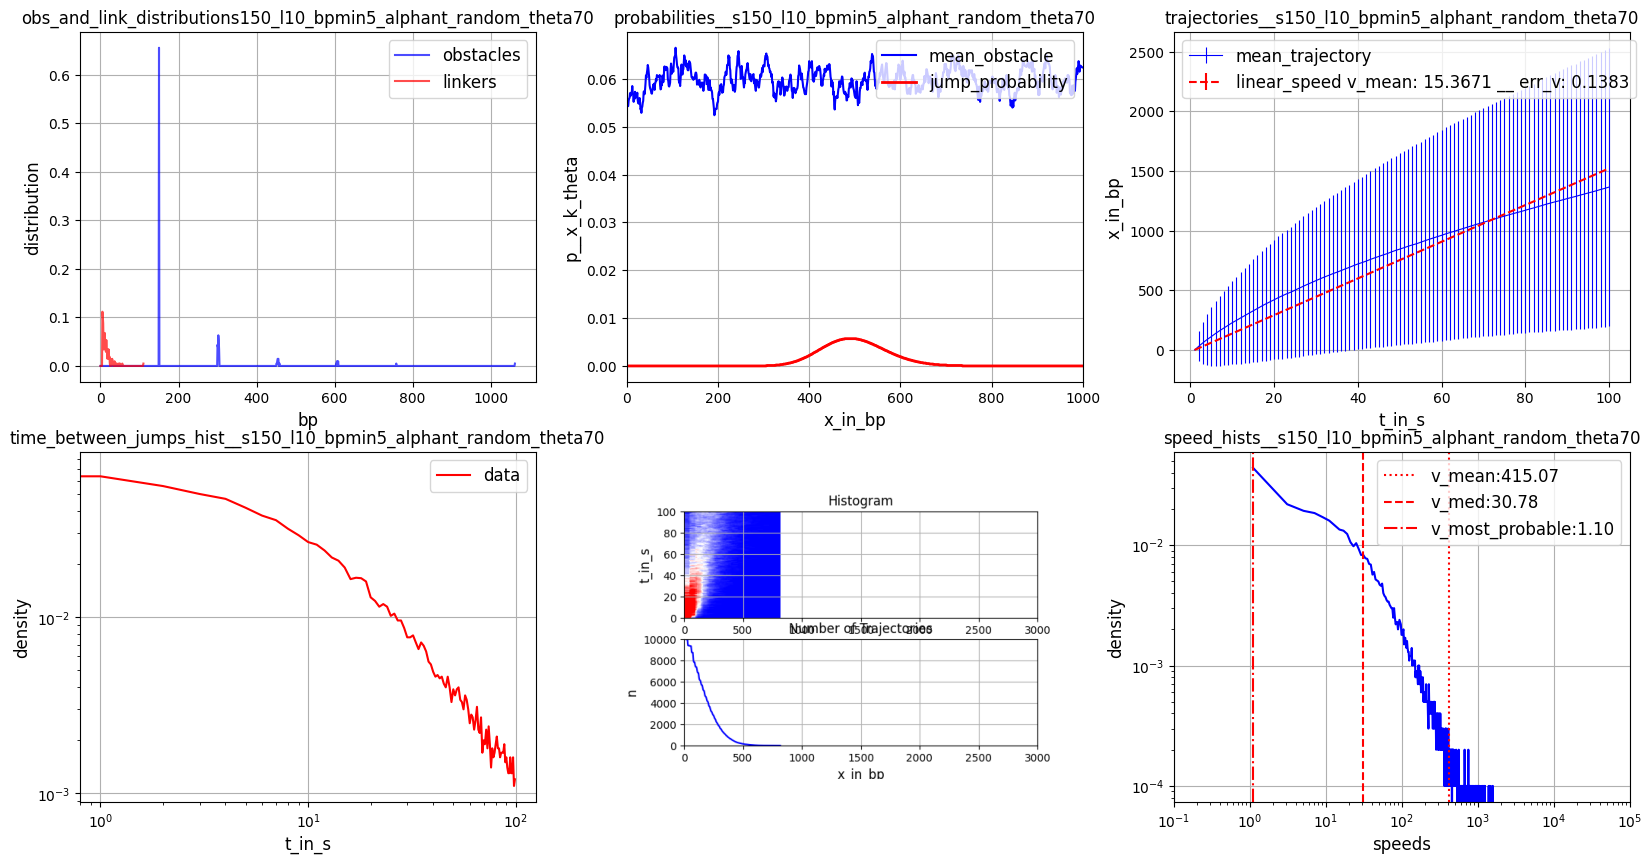

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [151]:
#---- Study ----#-- w for wanted
# df_w = main_file                                        # data frame containing the datas
s_w = 150                                               # Nucleosome size
l_w = 10                                                # Binding size
bp_min_w = 5                                            # Minimum binding size for chromatin
alpha_w = 'nt_random'                                   # Scenario
theta_w = 70
k_w = 500
saving = False
#----   ----#
L_max = 50000
origin = 10000
n_t = 10000
t_max = 100
#----   ----#


# Tests with json
os.chdir('/home/nicolas/data_tataki_nu_task_0/s150_l10_bp5_nt_random_k500_theta70_Lmax50000_nt10000')
with open('data_tataki_s150_l10_bp5_nt_random_k500_theta70_Lmax50000_nt10000.json', 'r') as json_file:
    alpha_w = 'nt_random'
    data = json.load(json_file)
df_w = pd.DataFrame(data)
print(df_w.head())




#
def all_plots(_df_, _s_, _l_, _bp_min_, _alpha_choice_, _theta_, _k_):
    
    # Filtering
    _df_filtered_ = _df_[(_df_['s'] == _s_) &
                         (_df_['l'] == _l_) &
                         (_df_['bp_min'] == _bp_min_) &
                         (_df_['alpha_choice'] == _alpha_choice_) &
                         (_df_['theta'] == _theta_) & 
                         (_df_['k'] == _k_)]
    
    # Plot parameters
    title_0 = f's{_s_}_l{_l_}_bpmin{_bp_min_}_alpha{_alpha_choice_}_theta{_theta_}'
    title_size, x_size, y_size, legend_size = 12, 12, 12, 12

    # Subplot
    fig, axs = plt.subplots(2, 3, figsize=(20, 10))

    # Subplot 1 : Obstacles
    distrib_obs = _df_filtered_['distrib_obs'].item()
    distrib_linker = _df_filtered_['distrib_linker'].item()
    plot_for_obs_and_links(distrib_obs, distrib_linker, title_0, title_size, x_size, y_size, legend_size, saving, axs[0, 0])

    # Subplot 2 : Probabilities
    mean_alpha = _df_filtered_['mean_alpha'].item()
    p = _df_filtered_['p'].item()
    plot_for_probabilities(mean_alpha, p, title_0, title_size, x_size, y_size, legend_size, saving, axs[0, 1])
    
    # Subplot 3 : Trajectories
    mean_results = _df_filtered_['mean_results'].item()
    std_gill = _df_filtered_['std_gill'].item()
    v_mean = _df_filtered_['v_mean'].item()
    vo = _df_filtered_['vo'].item()
    err_v = _df_filtered_['err_v'].item()
    plot_for_trajectories(mean_results, v_mean, vo, err_v, std_gill, title_0, title_size, x_size, y_size, legend_size, saving, axs[0, 2])

    # Subplot 4 : Jump time distribution
    jt_bj_hist = _df_filtered_['jt_bj_hist'].item()
    plot_for_jump_distribution(jt_bj_hist, v_mean, title_0, title_size, x_size, y_size, legend_size, saving, axs[1, 0])

    # Subplot 5 : FPT Distribution
    # fpt_bins = _df_filtered_['fpt_bin'].item()
    fpt_bin = _df_filtered_['fpt_bin'].item()
    fpt_results = _df_filtered_['fpt_results'].item()
    fpt_number = _df_filtered_['fpt_number'].item()
    plot_for_fpt_distribution(fpt_results, fpt_number, fpt_bin, title_0, title_size, x_size, y_size, L_max, origin, n_t, t_max, saving, axs[1, 1])
    
    # Subplot 6 : Instantaneous speeds
    v_inst_mean = _df_filtered_['v_inst_mean'].item()
    v_inst_med = _df_filtered_['v_inst_med'].item()
    mp_v_center = _df_filtered_['mp_v_center'].item()
    speed_hist = _df_filtered_['speed_hist'].item()
    bin_centers = _df_filtered_['bin_centers'].item()
    plot_for_instantaneous_speeds(bin_centers, speed_hist, v_inst_mean, v_inst_med, mp_v_center, title_0, title_size, x_size, y_size, legend_size, saving, axs[1, 2])

    # Ajuster la mise en page
    plt.tight_layout()
    plt.show()

    return None


all_plots(_df_=df_w, _s_=s_w, _l_=l_w, _bp_min_=bp_min_w, _alpha_choice_=alpha_w, _theta_=theta_w, _k_=k_w) 
# all_plots(_df_=df_w, _s_=s_w, _l_=l_w, _bp_min_=bp_min_w, _alpha_choice_=alpha_w, _theta_=theta_w, _k_=k_w) 
# all_plots(_df_=df_w, _s_=s_w, _l_=l_w, _bp_min_=bp_min_w, _alpha_choice_=alpha_w, _theta_=theta_w, _k_=k_w) 
# all_plots(_df_=df_w, _s_=s_w, _l_=l_w, _bp_min_=bp_min_w, _alpha_choice_=alpha_w, _theta_=theta_w, _k_=k_w) 

# .